#### 

# Parsing Hap.py outputs: Parsing Hap.py VC performance data

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import vcf
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import plotly.express as px
import statsmodels.api as sm

%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#### Pandas Viewing Settings

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Set matplotlib text export settings for Adobe Illustrator

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Parse info regarding samples of interest

In [5]:
Repo_DataDir = "../../Data"

PMP_SM_ResultsSummary_Dir_210108 = Repo_DataDir + "/210108_PMP_SM_50CI_V7_ResultsSummary"


PMP_50CI_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_50CI_AssemblySummary_V7.tsv"

PMP_42CI_CicularOnly_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_42CI_CircularOnly_F2Filtered_AssemblySummary_V7.tsv" 

PMP_36CI_CicularOnly_F2Filtered_AtLeast40XIllDepth_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_36CI_CircularOnly_F2Filtered_AtLeast40XMeanDepthIllumina_AssemblySummary_V7.tsv"       


PMP_50CI_AssemblySummary = pd.read_csv(PMP_50CI_AssemblySummary_TSV_PATH, sep = "\t")

PMP_42CI_CicularOnly_AssemblySummary = pd.read_csv(PMP_42CI_CicularOnly_AssemblySummary_TSV_PATH, sep = "\t")

PMP_36CI_CicularOnly_F2Filtered_AtLeast40XDepth_AssemblySummary = pd.read_csv(PMP_36CI_CicularOnly_F2Filtered_AtLeast40XIllDepth_AssemblySummary_TSV_PATH, sep = "\t")

PMP_36CI_AnalysisSet_AssemblySummary = PMP_36CI_CicularOnly_F2Filtered_AtLeast40XDepth_AssemblySummary


SampleIDs_36CI_SOI = list( PMP_36CI_AnalysisSet_AssemblySummary["SampleID"].values )


print(','.join(SampleIDs_36CI_SOI) )

# Make sample to lineage mapping dict

ID_To_IlluminaAvrgCov_Dict = dict(PMP_50CI_AssemblySummary[['SampleID', 'IlluminaWGSToH37rv_AvrgCov']].values)                     
ID_To_Lineage_Dict = dict(PMP_50CI_AssemblySummary[['SampleID', 'PrimaryLineage_PB']].values)
ID_To_Dataset_Dict = dict(PMP_50CI_AssemblySummary[['SampleID', 'Dataset_Tag']].values)

M0011368_9,M0014888_3,M0016395_7,M0010874_7,01_R1430,02_R0894,02_R1708,02_R1896,M0016737_0,M0017522_5,01_R1134,M0003941_3,02_R1179,N1176,N0072,N0153,N0145,N0155,N0004,N1274,N0054,N1272,N0091,N1202,N1177,RW-TB008,DNA028,DNA075,DNA091,DNA044,DNA020,AZE_02_042,DNA019_Rose,DNA120,DNA188,DNA086


## Construct dictionary with PATHs to relevant files for all samples

### Define directories to PMP-SM (PacBio assembly and analysis pipeline)

In [6]:
### Define directories to PMP-SM (PacBio assembly and analysis pipeline)

### Define varaint calling pipeline output directories

PacBio_ProjectDir = "/n/data1/hms/dbmi/farhat/mm774/Projects/PacBio_Evaluation_Project"

PMP_SM_Outputs_Dir = PacBio_ProjectDir + "/PacmanPipe_SM_Outputs"

PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir = PMP_SM_Outputs_Dir + "/201201_PMP_SM_TB_Portals_R1_Output_V2"



In [7]:
!ls -1 $PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir/M0011368_9/Hap.py_VariantCalling_EvalDir/

Happy_StratificationFiles
PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved
PBMM2_PBonly_NoPilonPolishing_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved


In [8]:
!ls -lah $PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir/M0011368_9/Hap.py_VariantCalling_EvalDir/PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved         

total 416K
drwxrwsr-x 13 mm774 farhat 1.3K Mar 22 22:06 .
drwxrwsr-x  5 mm774 farhat  289 Jan 21 14:48 ..
drwxrwsr-x  2 mm774 farhat  586 Mar 19 16:28 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat  648 Mar 22 22:06 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  586 Mar 19 16:28 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K100E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  586 Mar 19 16:28 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K50E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  586 Mar 25 11:12 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat 1.1K Mar 25 11:09 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  586 Mar 25 11:11 M0011368_9_Happy_VCeval_

## Save the PATHs of HapPy analysis from the following masking schemes:

1) "None" <br>
2) "Hicks_Regions_Removed" <br>
3)

In [9]:
SampleID_ToPaths_Dict = {}

for SampleID in SampleIDs_36CI_SOI:

    SampleID_ToPaths_Dict[SampleID] = {}    
    
    # Defining PATHs for PacBio data output (PacmanPipe-V4)
    sample_PMP_OutputDir = PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir + "/" + SampleID
    Happy_OutDir = f"{sample_PMP_OutputDir}/Hap.py_VariantCalling_EvalDir/PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved"
    
    
    # No Masking ("None")
    RegionFilteringScheme = "MM2vsPilon_NoneRemoved"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}
    
    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_NoRegionsRemoved"

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"
    
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CSV



    # Coscolla et al Masking Scheme ("Coscolla_Regions_Removed")
    RegionFilteringScheme = "MM2vsPilon_CoscollaRegionsRemoved"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}

    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_CoscollaRegionsRemoved"                                                    

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                   

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV               


    # Coscolla et al Masking Scheme ("MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed")
    RegionFilteringScheme = "MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}

    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_PE_PGRS_And_PPE_MPTR_Removed"                                                    

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                   

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV               

    
    
    
    # Pileup Mappability Masking - K50E4 ("Pmap_K50E4_Below_0.95_Removed")
    RegionFilteringScheme = "MM2vsPilon_Pmap_K50E4_Below_1_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}


    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_Pmap_K50E4_Below1Removed"                          

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K50E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K50E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                                

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K50E4_Below095_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K50E4_Below095_CSV               


    # Pileup Mappability Masking - K100E4 ("Pmap_K100E4_Below_0.95_Removed")
    RegionFilteringScheme = "MM2vsPilon_Pmap_K100E4_Below_1_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}


    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_Pmap_K100E4_Below1Removed"                          

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                                

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV               
 
    
    
    
    #  Masking based on Refined Low Confidence (RLC) regions
    RegionFilteringScheme = "MM2vsPilon_RLC_Regions_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}


    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_RefinedLowConfidenceRegionsRemoved"                          

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                                

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV               
 
    
       
    
    
    
    
    

## Parsing Hap.py Output from all 36 Mtb isolates

## Define function for parsing VariantCalling Performance

In [10]:
def parse_HapPy_Benchmark_CSV(input_HapPy_ROC_CSV_PATH):
    """ 
    """
    
    Sample_ROC_DF = pd.read_csv(input_HapPy_ROC_CSV_PATH) 
    #Sample_ROC_DF = Sample_ROC_DF.drop(Sample_ROC_DF.index[0])
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']

    Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  
    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index

    Sample_ROC_DF = Sample_ROC_DF.ffill()
    Sample_ROC_DF = Sample_ROC_DF.reset_index(drop=True)
    
    return Sample_ROC_DF
   

In [11]:
def parse_HapPy_Benchmark_CSV_NOFFILL(input_HapPy_ROC_CSV_PATH):
    """ 
    """
    
    Sample_ROC_DF = pd.read_csv(input_HapPy_ROC_CSV_PATH) 
    #Sample_ROC_DF = Sample_ROC_DF.drop(Sample_ROC_DF.index[0])
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']

    #Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  
    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index
    
    return Sample_ROC_DF
   

### UPDATED FFILL PARSER
#### This version adds a QQ==60 row to the dataframe if it doesn't exist

In [12]:
def parse_HapPy_Benchmark_DF_and_FFILL(Sample_ROC_DF):
    """ 
    """
    
    Sample_ROC_DF = Sample_ROC_DF[ Sample_ROC_DF["QQ"] != "*"]
    Sample_ROC_DF["QQ"] = Sample_ROC_DF["QQ"].astype(float)
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    
    
    if Sample_ROC_DF.shape[0] <= 1:
        print(Sample_ROC_DF.shape[0] )
        Sample_ROC_DF["QQ"] = -10
        return Sample_ROC_DF

    
    #print(Sample_ROC_DF[-1:].values.shape)
    
    Sample_ROC_DF_lastRow_ToMQ60 = pd.DataFrame(Sample_ROC_DF[-1:].values,  columns=Sample_ROC_DF.columns)
    
    MQ_Thresh_OfLastRow = Sample_ROC_DF_lastRow_ToMQ60["QQ"].values[0]
    
    if MQ_Thresh_OfLastRow != 60:
        print(MQ_Thresh_OfLastRow)
        Sample_ROC_DF_lastRow_ToMQ60["QQ"] = 60

        Sample_ROC_DF = Sample_ROC_DF.append(Sample_ROC_DF_lastRow_ToMQ60)
    
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']
    
    
    Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  
    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index

    Sample_ROC_DF = Sample_ROC_DF.ffill()
    Sample_ROC_DF = Sample_ROC_DF.reset_index(drop=True)
    
    return Sample_ROC_DF


In [13]:
def parse_HapPy_Benchmark_DF_and_FFILL_And_Add0_UpTo60QQ(Sample_ROC_DF):
    """ 
    """
    
    Sample_ROC_DF_OG = Sample_ROC_DF.copy()
    
    Sample_ROC_DF = Sample_ROC_DF[ Sample_ROC_DF["QQ"] != "*"]
    Sample_ROC_DF["QQ"] = Sample_ROC_DF["QQ"].astype(float)
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']

    if Sample_ROC_DF.shape[0] <= 1:
        print(Sample_ROC_DF.shape[0] )
        Sample_ROC_DF["QQ"] = -10
        return Sample_ROC_DF

    


    Sample_ROC_DF_lastRow_ToMQ60 = pd.DataFrame(Sample_ROC_DF.iloc[[-1]].values,  columns=Sample_ROC_DF.columns)
    MQ_Thresh_OfLastRow = Sample_ROC_DF_lastRow_ToMQ60["QQ"].values[0]

    if MQ_Thresh_OfLastRow != 60:
        print("Max QQ in table", Sample_ROC_DF.QQ.max() )
        Sample_ROC_DF_lastRow_ToMQ60["QQ"] = 60
        Sample_ROC_DF_lastRow_ToMQ60["METRIC.Recall"] = 0 # np.nan #0 # Set Recall to ZERO b/c there are still FN, but not a single one was called
        Sample_ROC_DF_lastRow_ToMQ60["METRIC.Precision"] = np.nan #0  # Set Precision to NAN b/c there were no Positive calls made at all
        Sample_ROC_DF_lastRow_ToMQ60["METRIC.F1_Score"] = 0 # np.nan #0   # Set F1 score to ZERO b/c Recall is ZERO
    

        #Sample_ROC_DF_lastRow_ToMQ60["QUERY.TPs"] = 0
        #Sample_ROC_DF_lastRow_ToMQ60["QUERY.TOTAL] + Sample_ROC_DF_lastRow_ToMQ60["TRUTH.TP"]


        Sample_ROC_DF_lastRow_ToMQ60.index = [60]

        Sample_ROC_DF = Sample_ROC_DF.append(Sample_ROC_DF_lastRow_ToMQ60)


    Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  

    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index

    Sample_ROC_DF = Sample_ROC_DF.ffill()

    Sample_ROC_DF = Sample_ROC_DF.reset_index(drop=True)

    return Sample_ROC_DF


In [14]:
SampleID_ToPaths_Dict["N0153"].keys()

dict_keys(['MM2vsPilon_NoneRemoved', 'MM2vsPilon_CoscollaRegionsRemoved', 'MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed', 'MM2vsPilon_Pmap_K50E4_Below_1_Removed', 'MM2vsPilon_Pmap_K100E4_Below_1_Removed', 'MM2vsPilon_RLC_Regions_Removed'])

In [15]:

listOf_FilteringSchemes = ["MM2vsPilon_CoscollaRegionsRemoved", # "MM2vsPilon_Pmap_K100E4_Below_1_Removed", #"MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed",
                           "MM2vsPilon_Pmap_K50E4_Below_1_Removed",
                           "MM2vsPilon_NoneRemoved",]


listOf_VariantTypes = ["SNPs", "INDELs"]


listOf_HapPy_DFs = []

for RegionFilteringScheme in tqdm(listOf_FilteringSchemes):
    for SampleID in (SampleIDs_36CI_SOI):
        for variantType in listOf_VariantTypes:
            #print(RegionFilteringScheme, SampleID, variantType)

            i_HapPy_ROC_PASS_CSV_PATH = SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme][variantType]["Happy_ROC_PASS_CSV"] 

            i_HapPy_PASS_DF = pd.read_csv(i_HapPy_ROC_PASS_CSV_PATH)
            
            i_HapPy_PASS_DF = parse_HapPy_Benchmark_DF_and_FFILL_And_Add0_UpTo60QQ(i_HapPy_PASS_DF)

            columnsToKeep_HappyTable = ['Type', 'Subtype', 'Subset', 'Filter', 'Genotype', 'QQ.Field',
                                         'QQ', 'METRIC.Recall', 'METRIC.Precision', 'METRIC.Frac_NA',
                                         'METRIC.F1_Score', 'TRUTH.TP', 'TRUTH.FN', 'QUERY.TP',
                                         'QUERY.FP', 'QUERY.UNK']


            i_VC_PR_Curve_DF = i_HapPy_PASS_DF[columnsToKeep_HappyTable]

            i_VC_PR_Curve_DF.loc[:,'SampleID'] = SampleID
            i_VC_PR_Curve_DF.loc[:,'RegionFilteringScheme'] = RegionFilteringScheme
            i_VC_PR_Curve_DF.loc[:,'variantType'] = variantType

            listOf_HapPy_DFs.append(i_VC_PR_Curve_DF)
            
HapPy_PR_DF_IndividualCurves = pd.concat(listOf_HapPy_DFs)

HapPy_PR_DF_IndividualCurves["QQ"] = HapPy_PR_DF_IndividualCurves["QQ"].astype(int) #Experimental

HapPy_PR_DF_IndivCurves_SNPs = HapPy_PR_DF_IndividualCurves[ HapPy_PR_DF_IndividualCurves["variantType"] == "SNPs"]
HapPy_PR_DF_IndivCurves_INDELs = HapPy_PR_DF_IndividualCurves[HapPy_PR_DF_IndividualCurves["variantType"] == "INDELs"]


  0%|          | 0/3 [00:00<?, ?it/s]/home/mm774/conda3/envs/py37_S/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mm774/conda3/envs/py37_S/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 3/3 [00:06<00:00,  2.02s/it]


In [16]:
!ls -lah /n/data1/hms/dbmi/farhat/mm774/Projects/PacBio_Evaluation_Project/PacmanPipe_SM_Outputs/201201_PMP_SM_TB_Portals_R1_Output_V2/N0091/Hap.py_VariantCalling_EvalDir/PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved/

total 416K
drwxrwsr-x 13 mm774 farhat 1.3K Mar 19 16:28 .
drwxrwsr-x  5 mm774 farhat  289 Jan 21 14:29 ..
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:29 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:21 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:29 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K100E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:29 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K50E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  531 Mar 25 10:54 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat  939 Mar 25 10:53 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  531 Mar 25 10:53 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pil

In [17]:
#i_VC_PR_Curve_DF

In [18]:
HapPy_PR_DF_IndividualCurves.head()

Type Subtype Subset Filter Genotype QQ.Field  QQ  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  TRUTH.TP  TRUTH.FN  QUERY.TP  QUERY.FP  QUERY.UNK    SampleID              RegionFilteringScheme variantType
0  SNP       *      *   PASS        *  INFO.MQ   0       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
1  SNP       *      *   PASS        *  INFO.MQ   1       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
2  SNP       *      *   PASS        *  INFO.MQ   2       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
3  SNP       *      *   PASS        *  INFO.MQ   3       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
4  SNP       *      *   PASS        *  INFO.MQ   4       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs

In [19]:
HapPy_PR_DF_IndividualCurves.shape

(13176, 19)

In [20]:
HapPy_PR_DF_IndividualCurves.head(3)

Type Subtype Subset Filter Genotype QQ.Field  QQ  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  TRUTH.TP  TRUTH.FN  QUERY.TP  QUERY.FP  QUERY.UNK    SampleID              RegionFilteringScheme variantType
0  SNP       *      *   PASS        *  INFO.MQ   0       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
1  SNP       *      *   PASS        *  INFO.MQ   1       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
2  SNP       *      *   PASS        *  INFO.MQ   2       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs

In [21]:
HapPy_PR_DF_IndividualCurves["RegionFilteringScheme"].value_counts()

MM2vsPilon_NoneRemoved                   4392
MM2vsPilon_CoscollaRegionsRemoved        4392
MM2vsPilon_Pmap_K50E4_Below_1_Removed    4392
Name: RegionFilteringScheme, dtype: int64

# Average (and calculate Standard Error of the mean) Precision and Recall across all 28 CI

In [22]:
# https://stackoverflow.com/questions/19202093/how-to-select-columns-from-groupby-object-in-pandas
HapPy_Mean_PR_DF = HapPy_PR_DF_IndividualCurves.groupby(["QQ", "RegionFilteringScheme", "variantType"]).mean().reset_index()
HapPy_STD_PR_DF = HapPy_PR_DF_IndividualCurves.groupby(["QQ", "RegionFilteringScheme", "variantType"]).std().reset_index()
HapPy_SEM_PR_DF = HapPy_PR_DF_IndividualCurves.groupby(["QQ", "RegionFilteringScheme", "variantType"]).sem().reset_index()


ColumnsToMergeOn = ["QQ", "RegionFilteringScheme", "variantType"]

HapPy_PR_DF = HapPy_Mean_PR_DF.merge(HapPy_SEM_PR_DF,
                                                     left_on = ColumnsToMergeOn,
                                                     right_on = ColumnsToMergeOn,
                                                     suffixes=('_MEAN', '_SEM') ).reset_index(drop=True)

In [23]:

# Divide PR-Curve results into INDELs and SNPs
HapPy_PR_DF_SNPs = HapPy_PR_DF[ HapPy_PR_DF["variantType"] == "SNPs"]
HapPy_PR_DF_SNPs_QQ_0to55 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [1]  +   list(np.arange(5, 60, 5)) )]   
HapPy_PR_DF_SNPs_QQ_0to60 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [1]  +   list(np.arange(5, 65, 5)) )]   


HapPy_PR_DF_INDELs = HapPy_PR_DF[HapPy_PR_DF["variantType"] == "INDELs"]
HapPy_PR_DF_INDELs_QQ_0to55 = HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["QQ"].isin(  [1]  +   list(np.arange(5, 60, 5)) )]   
HapPy_PR_DF_INDELs_QQ_0to60 = HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["QQ"].isin(  [1]  +   list(np.arange(5, 65, 5)) )]   

# Output SNS and INDEL variant calling results for supplemental tables

## A) Output Averaged Precision-Recall curves (Mean of 36 isolates)

In [24]:
HapPy_PR_DF_SNPs.head()

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
1   0      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
3   0                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056
5   0  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004658              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.194444           0.006129              0.000463            0.000981             0.003871     80.429530     15.995102     80.424803      0.535923       1.321266
7   1      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
9   1                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056

In [25]:
HapPy_PR_DF_SNPs.columns

Index(['QQ', 'RegionFilteringScheme', 'variantType', 'METRIC.Recall_MEAN', 'METRIC.Precision_MEAN', 'METRIC.Frac_NA_MEAN', 'METRIC.F1_Score_MEAN', 'TRUTH.TP_MEAN', 'TRUTH.FN_MEAN', 'QUERY.TP_MEAN', 'QUERY.FP_MEAN', 'QUERY.UNK_MEAN', 'METRIC.Recall_SEM', 'METRIC.Precision_SEM', 'METRIC.Frac_NA_SEM', 'METRIC.F1_Score_SEM', 'TRUTH.TP_SEM', 'TRUTH.FN_SEM', 'QUERY.TP_SEM', 'QUERY.FP_SEM', 'QUERY.UNK_SEM'], dtype='object')

In [26]:
Happy_ColNeededForExport = ['QQ', 'RegionFilteringScheme', 'variantType', 'METRIC.Recall_MEAN', 'METRIC.Precision_MEAN', 'METRIC.F1_Score_MEAN',
                            'METRIC.Recall_SEM', 'METRIC.Precision_SEM', 'METRIC.F1_Score_SEM' ]


HapPy_PR_DF_INDELs_Averaged_TrimCol = HapPy_PR_DF_INDELs[Happy_ColNeededForExport]
HapPy_PR_DF_SNPs_Averaged_TrimCol = HapPy_PR_DF_SNPs[Happy_ColNeededForExport]
HapPy_PR_DF_SNPs_Averaged_TrimCol.head(3)

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.F1_Score_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.F1_Score_SEM
1   0      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766              0.823115           0.006861              0.000878             0.004729
3   0                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446              0.934579           0.006137              0.001363             0.003155
5   0  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367              0.874814           0.006129              0.000463             0.003871

In [27]:
HapPy_PR_DF_INDELs_Averaged_TrimCol.shape

(183, 9)

In [28]:
PB_Vs_Illumina_DataAnalysis_Dir = "../../../210112_PBvsI_VCeval_AnalysisDir_V7_36CI"

Happy_VC_Eval_ResultsDir = f"{PB_Vs_Illumina_DataAnalysis_Dir}/Happy_VC_Eval_ResultsDir_36CI"

!mkdir $Happy_VC_Eval_ResultsDir

PR_Curve_SNS_VC_Results_TSV_PATH = f"{Happy_VC_Eval_ResultsDir}/Benchmarking.HapPy.SNSs.36CI.AveragedResults.tsv"
PR_Curve_INDEL_VC_Results_TSV_PATH = f"{Happy_VC_Eval_ResultsDir}/Benchmarking.HapPy.INDELs.36CI.AveragedResults.tsv"


HapPy_PR_DF_SNPs_Averaged_TrimCol.to_csv(PR_Curve_SNS_VC_Results_TSV_PATH, sep = "\t", index=False)
HapPy_PR_DF_INDELs_Averaged_TrimCol.to_csv(PR_Curve_INDEL_VC_Results_TSV_PATH, sep = "\t", index=False)

mkdir: cannot create directory ‘../../../210112_PBvsI_VCeval_AnalysisDir_V7_36CI/Happy_VC_Eval_ResultsDir_36CI’: File exists


In [29]:
!head -n 2 $PR_Curve_SNS_VC_Results_TSV_PATH

QQ	RegionFilteringScheme	variantType	METRIC.Recall_MEAN	METRIC.Precision_MEAN	METRIC.F1_Score_MEAN	METRIC.Recall_SEM	METRIC.Precision_SEM	METRIC.F1_Score_SEM
0	MM2vsPilon_CoscollaRegionsRemoved	SNPs	0.7039503333333335	0.9927659722222223	0.8231151388888889	0.006861265414433509	0.000877579020532934	0.004728686634525919


In [30]:
!head -n 2 $PR_Curve_INDEL_VC_Results_TSV_PATH

QQ	RegionFilteringScheme	variantType	METRIC.Recall_MEAN	METRIC.Precision_MEAN	METRIC.F1_Score_MEAN	METRIC.Recall_SEM	METRIC.Precision_SEM	METRIC.F1_Score_SEM
0	MM2vsPilon_CoscollaRegionsRemoved	INDELs	0.6171836666666666	0.9646821111111107	0.7508430000000001	0.0106792363859642	0.002772433277934682	0.008179884595277825


## B) Output individual Precision-Recall curves (Each PR curve for 36 isolates)

In [31]:
HapPy_PR_DF_IndivCurves_SNPs.head(3)

Type Subtype Subset Filter Genotype QQ.Field  QQ  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  TRUTH.TP  TRUTH.FN  QUERY.TP  QUERY.FP  QUERY.UNK    SampleID              RegionFilteringScheme variantType
0  SNP       *      *   PASS        *  INFO.MQ   0       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
1  SNP       *      *   PASS        *  INFO.MQ   1       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
2  SNP       *      *   PASS        *  INFO.MQ   2       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs

In [32]:
HapPy_PR_DF_IndivCurves_INDELs.head(3)

Type Subtype Subset Filter Genotype QQ.Field  QQ  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  TRUTH.TP  TRUTH.FN  QUERY.TP  QUERY.FP  QUERY.UNK    SampleID              RegionFilteringScheme variantType
0  INDEL       *      *   PASS        *  INFO.MQ   0       0.550562          0.960784             0.0              0.7      49.0      40.0      49.0       2.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved      INDELs
1  INDEL       *      *   PASS        *  INFO.MQ   1       0.550562          0.960784             0.0              0.7      49.0      40.0      49.0       2.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved      INDELs
2  INDEL       *      *   PASS        *  INFO.MQ   2       0.550562          0.960784             0.0              0.7      49.0      40.0      49.0       2.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved      INDELs

In [33]:
PB_Vs_Illumina_DataAnalysis_Dir = "../../../210112_PBvsI_VCeval_AnalysisDir_V7_36CI"

Happy_VC_Eval_ResultsDir = f"{PB_Vs_Illumina_DataAnalysis_Dir}/Happy_VC_Eval_ResultsDir_36CI"

!mkdir $Happy_VC_Eval_ResultsDir

PR_Curve_Individual_SNS_VC_Results_TSV_PATH = f"{Happy_VC_Eval_ResultsDir}/Benchmarking.HapPy.SNSs.36CI.IndividualResults.tsv"
PR_Curve_Individual_INDEL_VC_Results_TSV_PATH = f"{Happy_VC_Eval_ResultsDir}/Benchmarking.HapPy.INDELs.36CI.IndividualResults.tsv"


HapPy_PR_DF_IndivCurves_SNPs.to_csv(PR_Curve_Individual_SNS_VC_Results_TSV_PATH, sep = "\t", index=False)
HapPy_PR_DF_IndivCurves_INDELs.to_csv(PR_Curve_Individual_INDEL_VC_Results_TSV_PATH, sep = "\t", index=False)


mkdir: cannot create directory ‘../../../210112_PBvsI_VCeval_AnalysisDir_V7_36CI/Happy_VC_Eval_ResultsDir_36CI’: File exists


In [34]:
!ls -lah $Happy_VC_Eval_ResultsDir

total 824K
drwxrwsr-x  2 mm774 farhat  658 Mar 29 00:47 .
drwxrwsr-x 12 mm774 farhat  574 Mar 29 19:36 ..
-rw-rw-r--  1 mm774 farhat  29K Apr  3 15:08 Benchmarking.HapPy.INDELs.36CI.AveragedResults.tsv
-rw-rw-r--  1 mm774 farhat 868K Apr  3 15:08 Benchmarking.HapPy.INDELs.36CI.IndividualResults.tsv
-rw-rw-r--  1 mm774 farhat  40K Mar 31 16:18 Benchmarking.HapPy.INDELs.36CI.StratifiedBy.TypeAndLength.AveragedResults.tsv
-rw-rw-r--  1 mm774 farhat 1.1M Mar 31 16:18 Benchmarking.HapPy.INDELs.36CI.StratifiedBy.TypeAndLength.IndividualResults.tsv
-rw-rw-r--  1 mm774 farhat  29K Apr  3 15:08 Benchmarking.HapPy.SNSs.36CI.AveragedResults.tsv
-rw-rw-r--  1 mm774 farhat 885K Apr  3 15:08 Benchmarking.HapPy.SNSs.36CI.IndividualResults.tsv
-rw-rw-r--  1 mm774 farhat  34K Apr  1 18:01 Benchmarking.HapPy.SNSs.36CI.StratifiedBy.SVandPmapContext.AveragedResults.tsv
-rw-rw-r--  1 mm774 farhat 1.4M Apr  1 18:01 Benchmarking.HapPy.SNSs.36CI.StratifiedBy.SVandPmapContext.IndividualResults.tsv


In [35]:
HapPy_PR_DF_SNPs_QQ_30 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [30] )]   

In [36]:
HapPy_PR_DF.shape

(366, 21)

In [37]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 30 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
180  30      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.616656               0.975255             0.001738              0.753770      85.055556      51.027778      85.055556       2.055556        0.194444           0.010586              0.002851            0.000600             0.008309      5.766480      2.860371      5.752838      0.284366       0.066898
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
182  30                 MM2vsPilon_NoneRemoved      INDELs            0.819620               0.974803             0.004523              0.888867     111.805556      24.277778     113.888889       2.916667        0.555556           0.011322              0.002695            0.001117             0.007099      7.066220      2.077701      7.070033      0.336591       0.140546
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
184  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.724018               0.976643             0.004503              0.830137      99.277778      36.805556      99.250000       2.388889        0.472222           0.010425              0.002280            0.001284             0.007299      6.451358      2.399014      6.462882      0.259051       0.140781
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

In [38]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 30 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
180  30      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.616656               0.975255             0.001738              0.753770      85.055556      51.027778      85.055556       2.055556        0.194444           0.010586              0.002851            0.000600             0.008309      5.766480      2.860371      5.752838      0.284366       0.066898
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
182  30                 MM2vsPilon_NoneRemoved      INDELs            0.819620               0.974803             0.004523              0.888867     111.805556      24.277778     113.888889       2.916667        0.555556           0.011322              0.002695            0.001117             0.007099      7.066220      2.077701      7.070033      0.336591       0.140546
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
184  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.724018               0.976643             0.004503              0.830137      99.277778      36.805556      99.250000       2.388889        0.472222           0.010425              0.002280            0.001284             0.007299      6.451358      2.399014      6.462882      0.259051       0.140781
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

In [39]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 45 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
270  45      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.615280               0.991593             0.001767              0.757712      84.805556      51.277778      84.777778       0.500000        0.194444           0.010448              0.002291            0.000610             0.008375      5.722390      2.899538      5.717852      0.129099       0.066898
271  45      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.700487               0.998050             0.001349              0.822542    1062.194444     429.722222    1062.277778       1.750000        1.666667           0.006871              0.000380            0.000364             0.004776     75.812769     20.122033     75.779668      0.265399       0.430946
272  45                 MM2vsPilon_NoneRemoved      INDELs            0.805407               0.990683             0.004261              0.887053     109.833333      26.250000     111.694444       1.000000        0.500000           0.011079              0.001767            0.001157             0.007264      6.943708      2.146379      6.933679      0.178174       0.140859
273  45                 MM2vsPilon_NoneRemoved        SNPs            0.845784               0.993231             0.006229              0.913096    1271.222222     220.694444    1266.472222       8.166667        9.000000           0.006482              0.000972            0.000913             0.003796     85.381600     12.704694     85.444816      1.120870       1.512383
274  45  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.720483               0.985399             0.004547              0.831051      98.861111      37.222222      98.861111       1.361111        0.472222           0.010345              0.002205            0.001294             0.007429      6.447610      2.384843      6.429613      0.211393       0.140781
275  45  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.777031               0.998148             0.003642              0.873330    1171.500000     320.416667    1171.861111       2.000000        4.805556           0.006204              0.000332            0.000663             0.003951     80.427553     15.977036     80.420661      0.371612       0.912714

In [40]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 45 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
270  45      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.615280               0.991593             0.001767              0.757712      84.805556      51.277778      84.777778       0.500000        0.194444           0.010448              0.002291            0.000610             0.008375      5.722390      2.899538      5.717852      0.129099       0.066898
271  45      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.700487               0.998050             0.001349              0.822542    1062.194444     429.722222    1062.277778       1.750000        1.666667           0.006871              0.000380            0.000364             0.004776     75.812769     20.122033     75.779668      0.265399       0.430946
272  45                 MM2vsPilon_NoneRemoved      INDELs            0.805407               0.990683             0.004261              0.887053     109.833333      26.250000     111.694444       1.000000        0.500000           0.011079              0.001767            0.001157             0.007264      6.943708      2.146379      6.933679      0.178174       0.140859
273  45                 MM2vsPilon_NoneRemoved        SNPs            0.845784               0.993231             0.006229              0.913096    1271.222222     220.694444    1266.472222       8.166667        9.000000           0.006482              0.000972            0.000913             0.003796     85.381600     12.704694     85.444816      1.120870       1.512383
274  45  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.720483               0.985399             0.004547              0.831051      98.861111      37.222222      98.861111       1.361111        0.472222           0.010345              0.002205            0.001294             0.007429      6.447610      2.384843      6.429613      0.211393       0.140781
275  45  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.777031               0.998148             0.003642              0.873330    1171.500000     320.416667    1171.861111       2.000000        4.805556           0.006204              0.000332            0.000663             0.003951     80.427553     15.977036     80.420661      0.371612       0.912714

In [41]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 60 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
360  60      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.489165               1.000000             0.000000              0.651438      65.083333      71.000000      65.194444       0.000000        0.000000           0.015575              0.000000            0.000000             0.015199      3.991534      5.776526      3.997980      0.000000       0.000000
361  60      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632               0.999690             0.000743              0.772815     922.500000     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154            0.000180             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443
362  60                 MM2vsPilon_NoneRemoved      INDELs            0.602952               0.997163             0.000434              0.744498      78.722222      57.361111      79.888889       0.194444        0.027778           0.019238              0.001007            0.000434             0.017055      4.130723      5.964864      4.165767      0.066898       0.027778
363  60                 MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674    1037.750000     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887     59.651880     55.842275      0.259349       0.477053
364  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.562908               0.997926             0.000505              0.713097      74.000000      62.083333      73.944444       0.138889        0.027778           0.017979              0.000902            0.000505             0.016743      4.172662      5.947839      4.193522      0.058456       0.027778
365  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.699953               0.999393             0.001996              0.818015    1009.166667     482.750000    1009.111111       0.500000        2.222222           0.017643              0.000227            0.000328             0.014537     54.650542     59.698666     54.707415      0.188982       0.416164

In [42]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 60 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
360  60      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.489165               1.000000             0.000000              0.651438      65.083333      71.000000      65.194444       0.000000        0.000000           0.015575              0.000000            0.000000             0.015199      3.991534      5.776526      3.997980      0.000000       0.000000
361  60      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632               0.999690             0.000743              0.772815     922.500000     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154            0.000180             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443
362  60                 MM2vsPilon_NoneRemoved      INDELs            0.602952               0.997163             0.000434              0.744498      78.722222      57.361111      79.888889       0.194444        0.027778           0.019238              0.001007            0.000434             0.017055      4.130723      5.964864      4.165767      0.066898       0.027778
363  60                 MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674    1037.750000     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887     59.651880     55.842275      0.259349       0.477053
364  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.562908               0.997926             0.000505              0.713097      74.000000      62.083333      73.944444       0.138889        0.027778           0.017979              0.000902            0.000505             0.016743      4.172662      5.947839      4.193522      0.058456       0.027778
365  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.699953               0.999393             0.001996              0.818015    1009.166667     482.750000    1009.111111       0.500000        2.222222           0.017643              0.000227            0.000328             0.014537     54.650542     59.698666     54.707415      0.188982       0.416164

In [43]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 0 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
1   0      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
3   0                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056
5   0  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004658              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.194444           0.006129              0.000463            0.000981             0.003871     80.429530     15.995102     80.424803      0.535923       1.321266

In [44]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 1 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
7    1      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
9    1                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056
11   1  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004658              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.194444           0.006129              0.000463            0.000981             0.003871     80.429530     15.995102     80.424803      0.535923       1.321266

In [45]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

In [46]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 45 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
271  45      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.700487               0.998050             0.001349              0.822542    1062.194444     429.722222    1062.277778       1.750000        1.666667           0.006871              0.000380            0.000364             0.004776     75.812769     20.122033     75.779668      0.265399       0.430946
273  45                 MM2vsPilon_NoneRemoved        SNPs            0.845784               0.993231             0.006229              0.913096    1271.222222     220.694444    1266.472222       8.166667        9.000000           0.006482              0.000972            0.000913             0.003796     85.381600     12.704694     85.444816      1.120870       1.512383
275  45  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.777031               0.998148             0.003642              0.873330    1171.500000     320.416667    1171.861111       2.000000        4.805556           0.006204              0.000332            0.000663             0.003951     80.427553     15.977036     80.420661      0.371612       0.912714

In [47]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 55 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
331  55      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.696961               0.999364             0.000726              0.820552    1056.666667     435.250000    1056.416667       0.583333        0.888889           0.006798              0.000181            0.000173             0.004734     75.329530     20.596092     75.318850      0.151054       0.206166
333  55                 MM2vsPilon_NoneRemoved        SNPs            0.817583               0.996650             0.004174              0.897756    1230.694444     261.222222    1225.750000       3.916667        5.833333           0.006530              0.000620            0.000584             0.003928     83.484832     13.985713     83.505160      0.767779       1.021592
335  55  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.773657               0.998937             0.002425              0.871508    1166.527778     325.388889    1166.416667       1.111111        3.194444           0.006118              0.000284            0.000418             0.003919     80.084216     16.269715     80.086505      0.305447       0.615693

In [48]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 59 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
355  59      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.689993               0.999549             0.000701              0.815874    1042.472222     449.444444    1042.250000       0.388889        0.833333           0.006125              0.000180            0.000173             0.004301     72.390338     23.541771     72.336377      0.145175       0.201187
357  59                 MM2vsPilon_NoneRemoved        SNPs            0.791277               0.998689             0.003097              0.882493    1186.444444     305.472222    1182.500000       1.333333        4.055556           0.006224              0.000321            0.000418             0.003907     78.220876     19.170268     78.181936      0.298142       0.648496
359  59  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.762846               0.999354             0.002132              0.864828    1145.500000     346.416667    1145.444444       0.555556        2.722222           0.005636              0.000226            0.000347             0.003661     76.179201     20.370005     76.133461      0.192908       0.504914

In [49]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 60 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
361  60      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632               0.999690             0.000743              0.772815     922.500000     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154            0.000180             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443
363  60                 MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674    1037.750000     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887     59.651880     55.842275      0.259349       0.477053
365  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.699953               0.999393             0.001996              0.818015    1009.166667     482.750000    1009.111111       0.500000        2.222222           0.017643              0.000227            0.000328             0.014537     54.650542     59.698666     54.707415      0.188982       0.416164

In [50]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.Precision_MEAN", ascending=False).head(1)

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
361  60  MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632                0.99969             0.000743              0.772815          922.5     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154             0.00018             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443

In [51]:
HapPy_PR_DF_SNPs["RegionFilteringScheme"].value_counts()

MM2vsPilon_CoscollaRegionsRemoved        61
MM2vsPilon_Pmap_K50E4_Below_1_Removed    61
MM2vsPilon_NoneRemoved                   61
Name: RegionFilteringScheme, dtype: int64

In [52]:
HapPy_PR_DF_SNPs.describe()

QQ  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
count  183.000000          183.000000             183.000000           183.000000            183.000000     183.000000     183.000000     183.000000     183.000000      183.000000         183.000000            183.000000          183.000000           183.000000    183.000000    183.000000    183.000000    183.000000     183.000000
mean    30.000000            0.780749               0.994253             0.004216              0.872212    1176.563449     315.353218    1174.953097       6.750000        5.940194           0.006585              0.000711            0.000832             0.004190     80.574950     16.657822     80.583472      0.772673       1.211353
std     17.655121            0.070143               0.004493             0.002571              0.042725     102.320637     102.320637     100.400577       6.000300        4.086690           0.001410              0.000386            0.000447             0.001419      5.694106      6.522134      5.702394      0.529036       0.763070
min      0.000000            0.635632               0.985446             0.000701              0.772815     922.500000     157.305556     922.611111       0.222222        0.805556           0.005636              0.000154            0.000173             0.003150     52.553744     10.774884     52.586984      0.106243       0.201187
25%     15.000000            0.703939               0.992766             0.002119              0.823114    1067.583333     221.944444    1067.555556       2.333333        2.611111           0.006129              0.000369            0.000502             0.003773     76.318156     12.736908     76.313238      0.400672       0.659954
50%     30.000000            0.779561               0.995650             0.003926              0.874814    1174.833333     317.083333    1174.805556       4.555556        5.194444           0.006206              0.000618            0.000699             0.003894     80.397885     16.015807     80.398758      0.535923       1.019508
75%     45.000000            0.844945               0.997848             0.006216              0.912669    1269.972222     424.333333    1265.166667       7.986111        8.972222           0.006856              0.000949            0.000974             0.004728     85.298202     19.606486     85.341416      1.099480       1.506309
max     60.000000            0.889595               0.999690             0.009076              0.934600    1334.611111     569.416667    1329.694444      19.333333       13.916667           0.018426              0.001368            0.001794             0.014849     88.316713     59.698666     88.351201      1.873796       2.850056

## Parsing the highest F1-score for each masking approach (SNVs)

In [53]:
HapPy_PR_DF_SNPs.describe()

QQ  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
count  183.000000          183.000000             183.000000           183.000000            183.000000     183.000000     183.000000     183.000000     183.000000      183.000000         183.000000            183.000000          183.000000           183.000000    183.000000    183.000000    183.000000    183.000000     183.000000
mean    30.000000            0.780749               0.994253             0.004216              0.872212    1176.563449     315.353218    1174.953097       6.750000        5.940194           0.006585              0.000711            0.000832             0.004190     80.574950     16.657822     80.583472      0.772673       1.211353
std     17.655121            0.070143               0.004493             0.002571              0.042725     102.320637     102.320637     100.400577       6.000300        4.086690           0.001410              0.000386            0.000447             0.001419      5.694106      6.522134      5.702394      0.529036       0.763070
min      0.000000            0.635632               0.985446             0.000701              0.772815     922.500000     157.305556     922.611111       0.222222        0.805556           0.005636              0.000154            0.000173             0.003150     52.553744     10.774884     52.586984      0.106243       0.201187
25%     15.000000            0.703939               0.992766             0.002119              0.823114    1067.583333     221.944444    1067.555556       2.333333        2.611111           0.006129              0.000369            0.000502             0.003773     76.318156     12.736908     76.313238      0.400672       0.659954
50%     30.000000            0.779561               0.995650             0.003926              0.874814    1174.833333     317.083333    1174.805556       4.555556        5.194444           0.006206              0.000618            0.000699             0.003894     80.397885     16.015807     80.398758      0.535923       1.019508
75%     45.000000            0.844945               0.997848             0.006216              0.912669    1269.972222     424.333333    1265.166667       7.986111        8.972222           0.006856              0.000949            0.000974             0.004728     85.298202     19.606486     85.341416      1.099480       1.506309
max     60.000000            0.889595               0.999690             0.009076              0.934600    1334.611111     569.416667    1329.694444      19.333333       13.916667           0.018426              0.001368            0.001794             0.014849     88.316713     59.698666     88.351201      1.873796       2.850056

#### Highest F1-score across all approaches: 

In [54]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.F1_Score_MEAN", ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
51   8  MM2vsPilon_NoneRemoved        SNPs            0.889515               0.985586              0.00899                0.9346    1334.416667          157.5         1329.5      19.111111       13.777778           0.006126              0.001365            0.001766             0.003152     88.260458     10.795097     88.294785      1.857963       2.807335

In [55]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.F1_Score_MEAN", ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
51   8  MM2vsPilon_NoneRemoved        SNPs            0.889515               0.985586              0.00899                0.9346    1334.416667          157.5         1329.5      19.111111       13.777778           0.006126              0.001365            0.001766             0.003152     88.260458     10.795097     88.294785      1.857963       2.807335

#### Highest F1-score across "removing PLC regions": 

In [56]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_CoscollaRegionsRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
211  35  MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.702967               0.995032             0.001595              0.823216    1066.222222     425.694444    1066.083333       4.972222        1.972222           0.006857              0.000628            0.000454             0.004719     76.249206      19.64029     76.274904      0.533759       0.539674

In [57]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_CoscollaRegionsRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)    

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
361  60  MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632                0.99969             0.000743              0.772815          922.5     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154             0.00018             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443

#### Highest F1-score across "removing non-unique regions" (defined by P-map-K50-E4)": 

In [58]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_Pmap_K50E4_Below_1_Removed"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
119  19  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779781               0.997683             0.004281              0.874902    1175.166667         316.75    1175.027778       2.527778        5.666667           0.006119              0.000427            0.000863             0.003883     80.397885     16.020393     80.407667      0.446301       1.167687

In [59]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_Pmap_K50E4_Below_1_Removed"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)    

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
365  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.699953               0.999393             0.001996              0.818015    1009.166667         482.75    1009.111111            0.5        2.222222           0.017643              0.000227            0.000328             0.014537     54.650542     59.698666     54.707415      0.188982       0.416164

#### Highest F1-score across "removing no regions": 

In [60]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
51   8  MM2vsPilon_NoneRemoved        SNPs            0.889515               0.985586              0.00899                0.9346    1334.416667          157.5         1329.5      19.111111       13.777778           0.006126              0.001365            0.001766             0.003152     88.260458     10.795097     88.294785      1.857963       2.807335

In [61]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)    

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
363  60  MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674        1037.75     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887      59.65188     55.842275      0.259349       0.477053

In [62]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
361  60  MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632                0.99969             0.000743              0.772815          922.5     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154             0.00018             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443

In [63]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)     

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
363  60  MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674        1037.75     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887      59.65188     55.842275      0.259349       0.477053

In [64]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
241  40      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.701777               0.996216             0.001438              0.822811    1064.250000     427.666667    1064.083333       3.527778        1.777778           0.006857              0.000532            0.000397             0.004755     76.013025     19.899549     76.009172      0.411127       0.471592
243  40                 MM2vsPilon_NoneRemoved        SNPs            0.857734               0.991307             0.006618              0.919214    1288.833333     203.083333    1283.888889      10.694444        9.694444           0.006306              0.001154            0.001039             0.003591     86.309258     11.898204     86.304764      1.310410       1.689754
245  40  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.778555               0.997905             0.003720              0.874215    1173.500000     318.416667    1173.500000       2.250000        4.916667           0.006116              0.000359            0.000687             0.003889     80.381980     15.983989     80.356937      0.395159       0.943966

#### MQ == 40
PLC removed          Recall 70.2% Precision 99.6% F1 score = 0.82

Non-unique removed   Recall 77.9% Precision 99.8% F1 = 0.87

No masking           Recall 85.8%   Precision = 99.1%.   F1 = 0.92


In [65]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 60 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
361  60      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632               0.999690             0.000743              0.772815     922.500000     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154            0.000180             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443
363  60                 MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674    1037.750000     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887     59.651880     55.842275      0.259349       0.477053
365  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.699953               0.999393             0.001996              0.818015    1009.166667     482.750000    1009.111111       0.500000        2.222222           0.017643              0.000227            0.000328             0.014537     54.650542     59.698666     54.707415      0.188982       0.416164

In [66]:
#### MQ == 60
# PLC removed          F1 score = 0.77   Precision = 99.97%    Recall == 63.6%

# Non-Unique removed   F1-score = 0.818   Precision = 99.94%   Recall == 70.0%

# No masking           F1-score = 0.83.   Precision = 99.90%   Recall == 72.1%



### Make a histogram or violin plot comparing the F1-scores of different masking approaches

In [67]:
HapPy_PR_DF_SNPs.head(1)

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
1   0  MM2vsPilon_CoscollaRegionsRemoved        SNPs             0.70395               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881

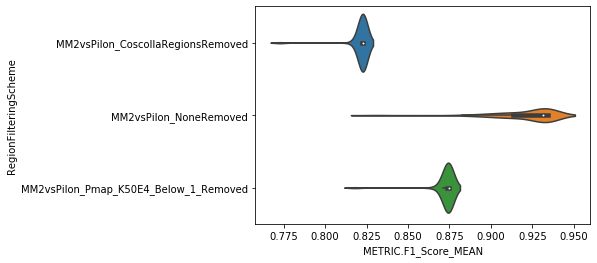

In [68]:
sns.violinplot(y="RegionFilteringScheme", x="METRIC.F1_Score_MEAN", data=HapPy_PR_DF_SNPs)

In [69]:
HapPy_PR_DF_SNPs_QQ_0to60.head(3)

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
7    1      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
9    1                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056
11   1  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004658              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.194444           0.006129              0.000463            0.000981             0.003871     80.429530     15.995102     80.424803      0.535923       1.321266

# Plotting Precision-Recall curves for SNV calling

### Set color scheme for plotting

In [70]:
listOf_FilteringSchemes = ["MM2vsPilon_NoneRemoved",
                           "MM2vsPilon_CoscollaRegionsRemoved", 
                           "MM2vsPilon_Pmap_K50E4_Below_1_Removed", ]


dictOf_FilterSchemeToColor = {"MM2vsPilon_NoneRemoved" : "#C8355D",
                              "MM2vsPilon_CoscollaRegionsRemoved" : "#2277B4", 
                               "MM2vsPilon_Pmap_K50E4_Below_1_Removed" : "#0F814B"  }


mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


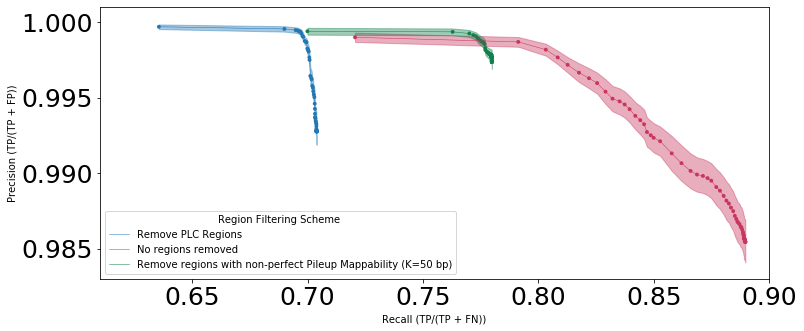

In [71]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()



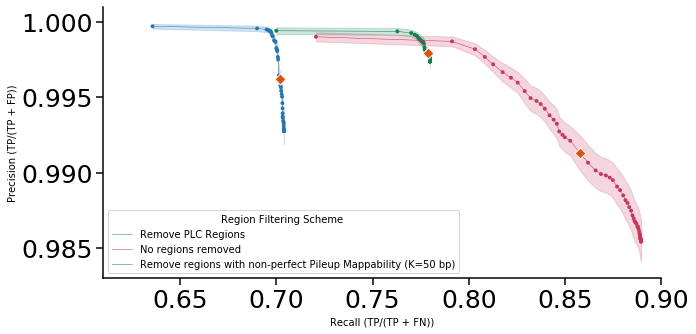

In [72]:
f, axes = plt.subplots(1, 1, figsize=(10,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.2, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "#E05307", #style = "variantType", # "#F08043"
                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )], ax=axes, marker="D", legend=False, s=60, linewidth=1, zorder=100)

axes.spines["left"].set_linewidth(1.5)
axes.spines["bottom"].set_linewidth(1.5)

sns.despine(ax=axes)

axes.tick_params(width=1.5, length=7)

#axes.xaxis.set_tick_params(width=1.5)
    
    
    
#plt.title('SNS Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()


## Output Figure 5-A: SNVs Performance across different masking schemes

- No Legend
- Despine plot (w/ sns function)
- Change tick aspects

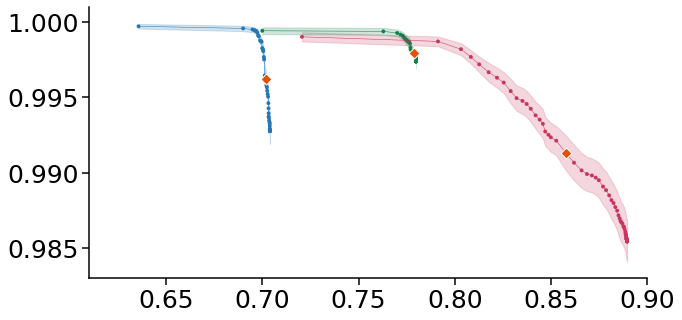

In [73]:
f, axes = plt.subplots(1, 1, figsize=(10,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.2, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "#E05307", #style = "variantType", # "#F08043"
                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )], ax=axes, marker="D", legend=False, s=60, linewidth=1, zorder=100)

axes.spines["left"].set_linewidth(1.5)
axes.spines["bottom"].set_linewidth(1.5)

sns.despine(ax=axes)

axes.tick_params(width=1.5, length=7)

#axes.xaxis.set_tick_params(width=1.5)
    
    
    
#plt.title('SNS Variant Calling Performance')
    
axes.set_xlabel("")
axes.set_ylabel("")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

#axes.set_xticklabels(['1','0.995','0.990','0.985',])

#plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/Fig5A_VC_Eval_36CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40BlackX.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/Fig5A_VC_Eval_36CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40BlackX.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=300)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


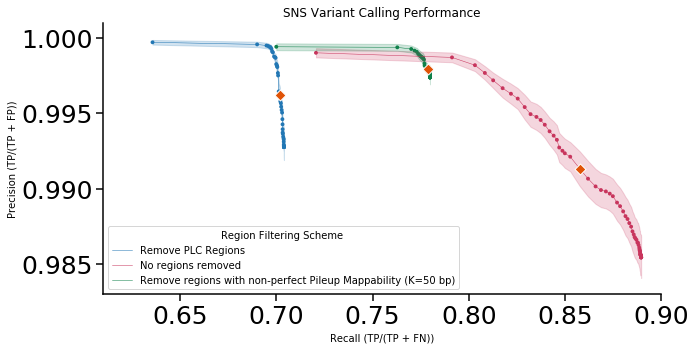

In [74]:
f, axes = plt.subplots(1, 1, figsize=(10,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.2, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "#E05307", #style = "variantType", # "#F08043"
                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )], ax=axes, marker="D", legend=False, s=60, linewidth=1, zorder=100)

axes.spines["left"].set_linewidth(1.5)
axes.spines["bottom"].set_linewidth(1.5)

sns.despine(ax=axes)

axes.tick_params(width=1.5, length=7,  labelsize=1)
#axes.xaxis.set_tick_params(width=1.5)
    
plt.title('SNS Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()


### Plot Precision-Recall curve for data points with MQ threshold 1 to 60 (Moving by 5)

mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


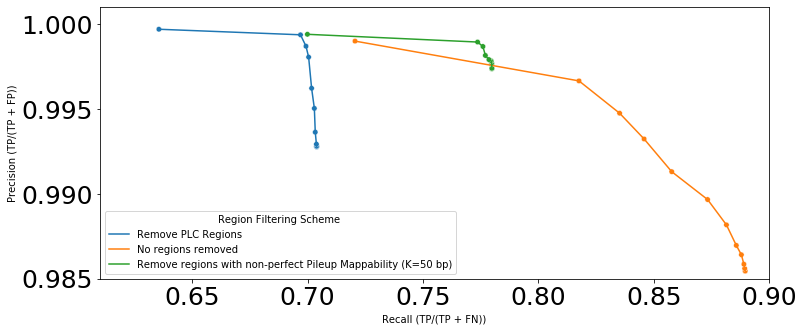

In [75]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_0to60  

### Precision Recall
sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=30)

#axes.set_title("Precision-Recall Curve: Comparing different")
#axes.set_xlabel("TPR (TP/(TP + FN))")
#axes.set_ylabel("PPV (TP/(TP + FP))")
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)


plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ_0to60by5_V2.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ_0to60by5_V2.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

In [76]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

In [77]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 45 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
271  45      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.700487               0.998050             0.001349              0.822542    1062.194444     429.722222    1062.277778       1.750000        1.666667           0.006871              0.000380            0.000364             0.004776     75.812769     20.122033     75.779668      0.265399       0.430946
273  45                 MM2vsPilon_NoneRemoved        SNPs            0.845784               0.993231             0.006229              0.913096    1271.222222     220.694444    1266.472222       8.166667        9.000000           0.006482              0.000972            0.000913             0.003796     85.381600     12.704694     85.444816      1.120870       1.512383
275  45  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.777031               0.998148             0.003642              0.873330    1171.500000     320.416667    1171.861111       2.000000        4.805556           0.006204              0.000332            0.000663             0.003951     80.427553     15.977036     80.420661      0.371612       0.912714

In [78]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 60 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
361  60      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.635632               0.999690             0.000743              0.772815     922.500000     569.416667     922.611111       0.222222        0.805556           0.015165              0.000154            0.000180             0.013363     52.553744     59.048331     52.586984      0.106243       0.202443
363  60                 MM2vsPilon_NoneRemoved        SNPs            0.720577               0.998992             0.002725              0.831674    1037.750000     454.166667    1034.277778       0.916667        3.083333           0.018426              0.000305            0.000357             0.014849     55.844887     59.651880     55.842275      0.259349       0.477053
365  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.699953               0.999393             0.001996              0.818015    1009.166667     482.750000    1009.111111       0.500000        2.222222           0.017643              0.000227            0.000328             0.014537     54.650542     59.698666     54.707415      0.188982       0.416164

In [79]:
HapPy_PR_DF_SNPs_QQ_30

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

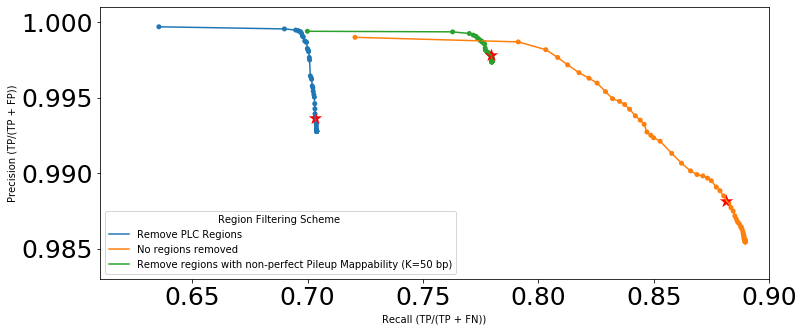

In [80]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_SNPs_QQ_30, ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, 
    #                 y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
    #                 y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()



In [81]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

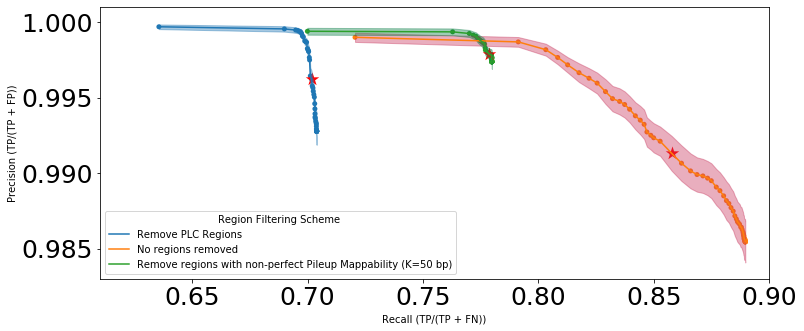

In [82]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)




#sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
#                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )], ax=axes, marker="+", legend=False, s=200, linewidth=0)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )], ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()



mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


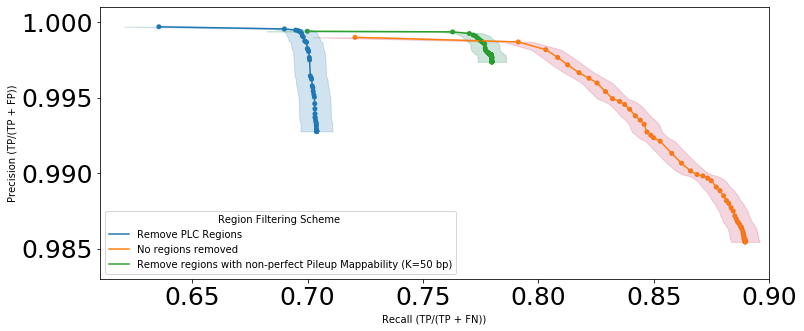

In [83]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()



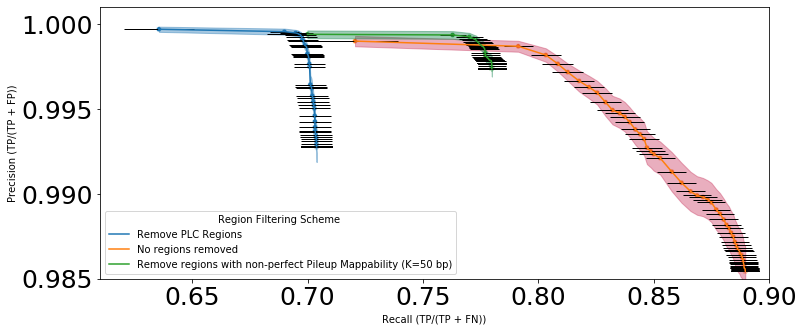

In [84]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs

### Precision Recall


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_WithY_PrecisionSEM_Shaded_WithX_SEM_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_WithY_PrecisionSEM_Shaded_WithX_SEM_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

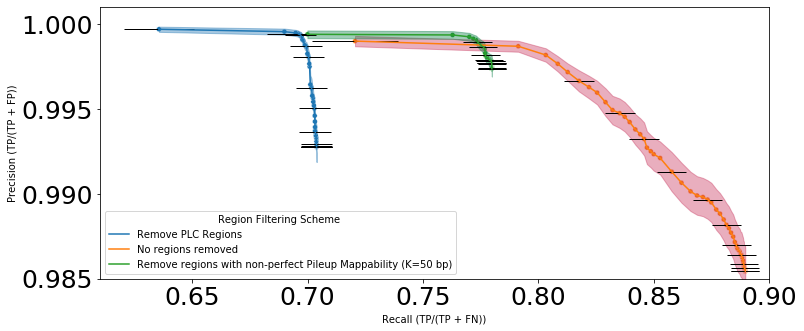

In [85]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs

### Precision Recall


#plt.errorbar(x = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Recall_MEAN"] , y = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Recall_MEAN"] , y = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


plt.show()

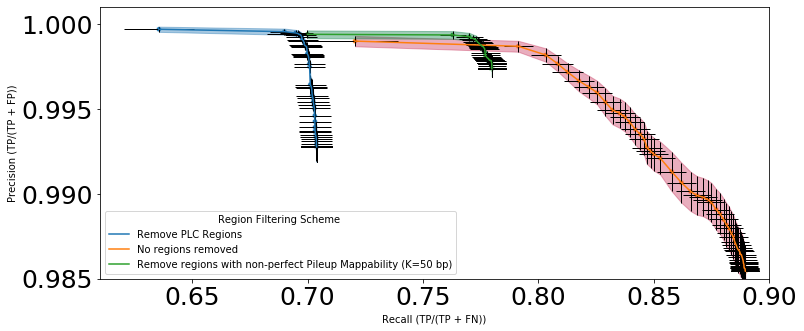

In [86]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs

### Precision Recall


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

### Plotting F1-score distributions for SNV calling (MQ 1 to 60)

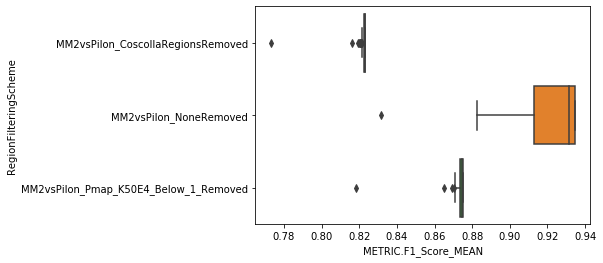

In [87]:
sns.boxplot(y="RegionFilteringScheme", x="METRIC.F1_Score_MEAN", data=HapPy_PR_DF_SNPs)

plt.show()

## Plotly Interactive Plot of Precision-Recall SNV Curve

In [88]:
#input_DF = HapPy_PR_DF_SNPs_QQ_0to60  

#fig = px.scatter(input_DF, x = "METRIC.Recall_MEAN", y = "METRIC.Precision_MEAN", hover_data=["QQ", "METRIC.F1_Score_MEAN", "QUERY.TP_MEAN", "QUERY.FP_MEAN", "TRUTH.FN_MEAN"],
#                 color = "RegionFilteringScheme", range_y=(0.98, 1))

#fig.show()

In [89]:
HapPy_PR_DF_SNPs_QQ_30 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [30] )]   

In [90]:
HapPy_PR_DF_SNPs_QQ_30.shape

(3, 21)

In [91]:
HapPy_PR_DF_SNPs_QQ_30

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


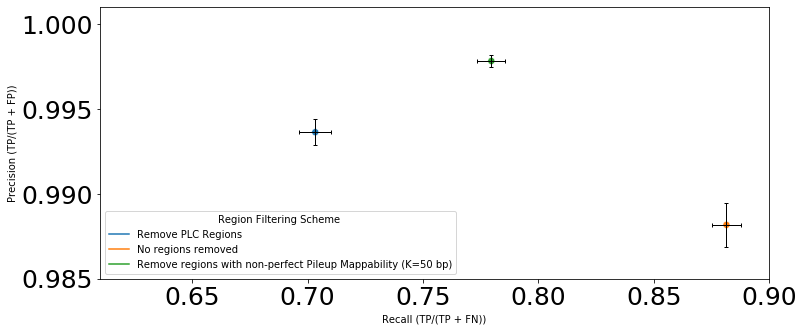

In [92]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_30  

### Precision Recall

plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ30_only_V2.png"       
plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


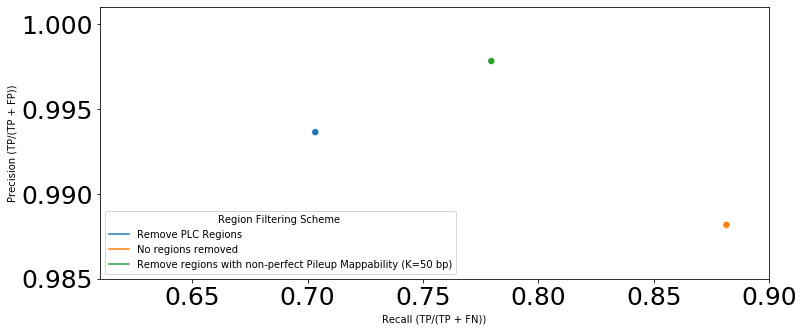

In [93]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_30  

### Precision Recall

#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ30_only_V2_WITHOUTERRORBARS.png"       
plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [94]:
HapPy_PR_DF_SNPs_QQ_30

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
181  30      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703359               0.993631             0.001661              0.823002    1066.805556     425.111111    1066.833333       6.305556        2.055556           0.006871              0.000756            0.000479             0.004729     76.295383     19.616270     76.348403      0.629713       0.571748
183  30                 MM2vsPilon_NoneRemoved        SNPs            0.881437               0.988175             0.007697              0.931280    1323.222222     168.694444    1318.111111      15.166667       11.611111           0.006200              0.001275            0.001381             0.003328     87.946088     10.888746     87.929533      1.522060       2.203993
185  30  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779611               0.997821             0.003967              0.874849    1174.916667     317.000000    1174.916667       2.388889        5.250000           0.006114              0.000364            0.000760             0.003879     80.388169     16.020869     80.405484      0.400947       1.037683

In [95]:
HapPy_PR_DF_SNPs_QQ_50 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [55] )]   

mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


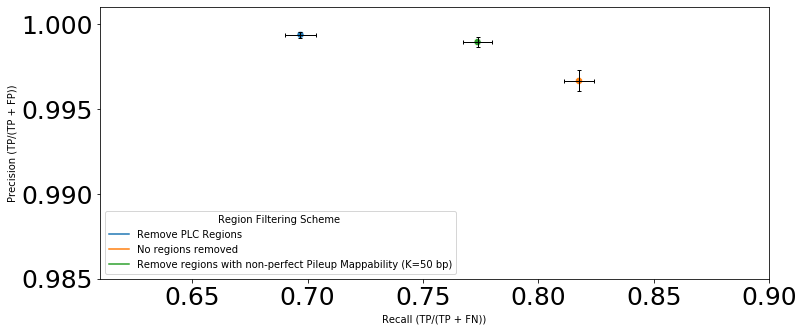

In [96]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_50  


### Precision Recall

plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=True)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/
Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ50_only_V2.png"       
#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [97]:
HapPy_PR_DF_SNPs_QQ_50.head(3)

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
331  55      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.696961               0.999364             0.000726              0.820552    1056.666667     435.250000    1056.416667       0.583333        0.888889           0.006798              0.000181            0.000173             0.004734     75.329530     20.596092     75.318850      0.151054       0.206166
333  55                 MM2vsPilon_NoneRemoved        SNPs            0.817583               0.996650             0.004174              0.897756    1230.694444     261.222222    1225.750000       3.916667        5.833333           0.006530              0.000620            0.000584             0.003928     83.484832     13.985713     83.505160      0.767779       1.021592
335  55  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.773657               0.998937             0.002425              0.871508    1166.527778     325.388889    1166.416667       1.111111        3.194444           0.006118              0.000284            0.000418             0.003919     80.084216     16.269715     80.086505      0.305447       0.615693

mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


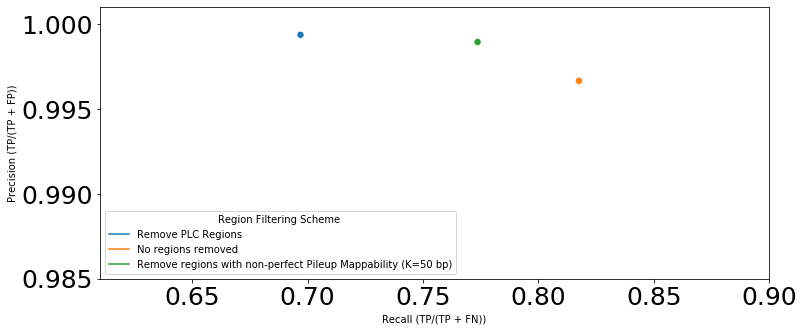

In [98]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_50  


### Precision Recall

#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=True)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/
Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ50_only_V2_WITHOUT_ERRORBARS.png"       
#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [99]:
#HapPy_Mean_PR_DF_SNPs.sort_values(by=['METRIC.F1_Score'], ascending = False)

## Interactive Precision-Recall Plot - SNV Precision-Recall Curve

In [100]:
HapPy_PR_DF_SNPs_QQ_0to60.head(6)

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
7    1      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
9    1                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056
11   1  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004658              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.194444           0.006129              0.000463            0.000981             0.003871     80.429530     15.995102     80.424803      0.535923       1.321266
31   5      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
33   5                 MM2vsPilon_NoneRemoved        SNPs            0.889561               0.985465             0.009059              0.934569    1334.527778     157.388889    1329.638889      19.305556       13.888889           0.006130              0.001360            0.001790             0.003152     88.292394     10.777275     88.336830      1.868630       2.842640
35   5  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004623              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.138889           0.006129              0.000463            0.000974             0.003871     80.429530     15.995102     80.424803      0.535923       1.310612

In [101]:
input_DF = HapPy_PR_DF_SNPs_QQ_0to60 

#fig = px.scatter(input_DF,
#                 x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",
#                 hover_data = ["QQ", "RegionFilteringScheme", "variantType", "METRIC.Recall_SEM",
#                               "METRIC.Precision_SEM", "METRIC.F1_Score_MEAN", "TRUTH.TP_MEAN", "TRUTH.FN_MEAN",
#                               "QUERY.TP_MEAN", "QUERY.FP_MEAN"],
#                 color = "RegionFilteringScheme", range_y=(0.985, 1.001), range_x=(0.61, 0.9))

#fig.show()

# Evaluating INDEL calling

## Parsing the highest F1-score for each masking approach (INDELs)

In [102]:
HapPy_PR_DF_INDELs.describe()

QQ  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
count  183.000000          183.000000             183.000000           183.000000            183.000000     183.000000     183.000000     183.000000     183.000000      183.000000         183.000000            183.000000          183.000000           183.000000    183.000000    183.000000    183.000000    183.000000     183.000000
mean    30.000000            0.712654               0.978871             0.003292              0.820172      97.614299      38.469035      98.250455       2.103673        0.370370           0.010826              0.002308            0.000951             0.007734      6.333704      2.538385      6.328351      0.241846       0.108489
std     17.655121            0.084403               0.011730             0.001425              0.056697      11.265072      11.265072      11.960551       1.322433        0.169550           0.000979              0.000633            0.000322             0.001233      0.606855      0.556721      0.599804      0.101131       0.039182
min      0.000000            0.489165               0.962155             0.000000              0.651438      65.083333      23.666667      65.194444       0.000000        0.000000           0.009938              0.000000            0.000000             0.006866      3.991534      2.025238      3.997980      0.000000       0.000000
25%     15.000000            0.617184               0.967388             0.001832              0.755874      85.138889      26.305556      85.222222       0.777778        0.194444           0.010425              0.002183            0.000603             0.007249      5.775585      2.156826      5.768980      0.160741       0.070273
50%     30.000000            0.724018               0.976643             0.004243              0.829947      99.277778      36.805556      99.222222       2.388889        0.472222           0.010586              0.002280            0.001082             0.007333      6.451358      2.399014      6.462882      0.250352       0.140153
75%     45.000000            0.805058               0.989817             0.004503              0.886108     109.777778      50.944444     111.597222       3.027778        0.500000           0.011183              0.002772            0.001284             0.008180      6.939139      2.859666      6.923688      0.271639       0.140781
max     60.000000            0.824032               1.000000             0.004594              0.890859     112.416667      71.000000     114.250000       4.527778        0.583333           0.019238              0.003260            0.001298             0.017055      7.104367      5.964864      7.071447      0.422551       0.140859

In [103]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 40 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
240  40      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.615410               0.991133             0.001765              0.757668      84.833333      51.250000      84.805556       0.555556        0.194444           0.010430              0.002266            0.000609             0.008339      5.727475      2.887954      5.722806      0.128757       0.066898
242  40                 MM2vsPilon_NoneRemoved      INDELs            0.808410               0.988836             0.004237              0.888085     110.305556      25.777778     112.250000       1.250000        0.500000           0.011265              0.002065            0.001152             0.007363      7.004173      2.111612      6.982560      0.240288       0.140859
244  40  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.721404               0.981680             0.004527              0.830228      99.027778      37.055556      99.055556       1.888889        0.472222           0.010465              0.002311            0.001290             0.007373      6.479698      2.372442      6.466881      0.263607       0.140781

#### Highest F1-score across all approaches: 

In [104]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.F1_Score_MEAN", ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
206  34  MM2vsPilon_NoneRemoved      INDELs            0.818106               0.981443             0.004378              0.890859     111.583333           24.5     113.527778       2.083333        0.527778           0.011281              0.002244            0.001133             0.007253      7.044797      2.081475      7.038498      0.253155       0.140781

#### Highest F1-score across "removing PLC regions": 

In [105]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_CoscollaRegionsRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
270  45  MM2vsPilon_CoscollaRegionsRemoved      INDELs             0.61528               0.991593             0.001767              0.757712      84.805556      51.277778      84.777778            0.5        0.194444           0.010448              0.002291             0.00061             0.008375       5.72239      2.899538      5.717852      0.129099       0.066898

#### Highest F1-score across "removing non-unique regions" (defined by P-map-K50-E4)": 

In [106]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_Pmap_K50E4_Below_1_Removed"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
298  49  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.719304               0.989347             0.004393               0.83179      98.666667      37.416667          98.75       0.833333        0.444444           0.010136              0.002168            0.001277             0.007444      6.420083      2.384598      6.420253       0.15171       0.134781

#### Highest F1-score across "removing no regions": 

In [107]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
206  34  MM2vsPilon_NoneRemoved      INDELs            0.818106               0.981443             0.004378              0.890859     111.583333           24.5     113.527778       2.083333        0.527778           0.011281              0.002244            0.001133             0.007253      7.044797      2.081475      7.038498      0.253155       0.140781

In [108]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
348  58  MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.581033                    1.0                  0.0              0.732865      80.194444      55.888889      80.194444            0.0             0.0            0.01094                   0.0                 0.0             0.008846      5.487767      3.158706      5.490225           0.0            0.0

In [109]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)     

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
362  60  MM2vsPilon_NoneRemoved      INDELs            0.602952               0.997163             0.000434              0.744498      78.722222      57.361111      79.888889       0.194444        0.027778           0.019238              0.001007            0.000434             0.017055      4.130723      5.964864      4.165767      0.066898       0.027778

### Make a histogram or violin plot comparing the F1-scores of different masking approaches

In [110]:
HapPy_PR_DF_INDELs.head(1)

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
0   0  MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.617184               0.964682             0.001896              0.750843      85.138889      50.944444      85.222222       3.027778        0.222222           0.010679              0.002772            0.000603              0.00818      5.775585      2.859666       5.76898      0.271639       0.070273

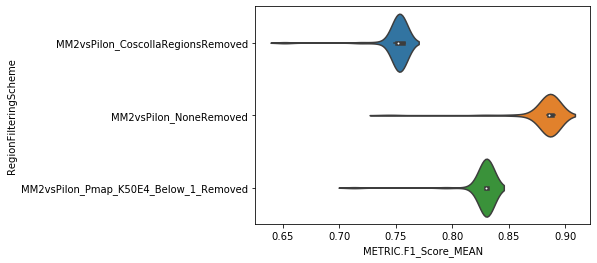

In [111]:
sns.violinplot(y="RegionFilteringScheme", x="METRIC.F1_Score_MEAN", data=HapPy_PR_DF_INDELs)

# Plotting Precision-Recall curves for INDEL calling

In [112]:
HapPy_PR_DF_INDELs_QQ_0to60.head(3)

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
6    1      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.617184               0.964682             0.001896              0.750843      85.138889      50.944444      85.222222       3.027778        0.222222           0.010679              0.002772            0.000603             0.008180      5.775585      2.859666      5.768980      0.271639       0.070273
8    1                 MM2vsPilon_NoneRemoved      INDELs            0.824032               0.962155             0.004558              0.886108     112.416667      23.666667     114.250000       4.527778        0.583333           0.011350              0.002973            0.001082             0.007019      7.104367      2.032279      7.071447      0.422551       0.140153
10   1  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.724018               0.976122             0.004503              0.829947      99.277778      36.805556      99.250000       2.472222        0.472222           0.010425              0.002185            0.001284             0.007286      6.451358      2.399014      6.462882      0.250352       0.140781

In [113]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 0 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
0   0      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.617184               0.964682             0.001896              0.750843      85.138889      50.944444      85.222222       3.027778        0.222222           0.010679              0.002772            0.000603             0.008180      5.775585      2.859666      5.768980      0.271639       0.070273
2   0                 MM2vsPilon_NoneRemoved      INDELs            0.824032               0.962155             0.004558              0.886108     112.416667      23.666667     114.250000       4.527778        0.583333           0.011350              0.002973            0.001082             0.007019      7.104367      2.032279      7.071447      0.422551       0.140153
4   0  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.724018               0.976122             0.004503              0.829947      99.277778      36.805556      99.250000       2.472222        0.472222           0.010425              0.002185            0.001284             0.007286      6.451358      2.399014      6.462882      0.250352       0.140781

In [114]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 55 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
330  55      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.604719               0.998701             0.000777              0.751390      83.194444      52.888889      83.583333       0.083333        0.083333           0.010604              0.000755            0.000436             0.008350      5.567881      3.090636      5.590010      0.046718       0.046718
332  55                 MM2vsPilon_NoneRemoved      INDELs            0.784369               0.995056             0.002522              0.875848     106.722222      29.361111     108.888889       0.527778        0.250000           0.010672              0.001353            0.000916             0.007063      6.611271      2.329982      6.653293      0.140781       0.092367
334  55  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.715985               0.992149             0.002809              0.830459      98.138889      37.944444      98.027778       0.583333        0.250000           0.010236              0.002027            0.001029             0.007449      6.365102      2.473974      6.332768      0.134371       0.092367

In [115]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 60 )]

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
360  60      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.489165               1.000000             0.000000              0.651438      65.083333      71.000000      65.194444       0.000000        0.000000           0.015575              0.000000            0.000000             0.015199      3.991534      5.776526      3.997980      0.000000       0.000000
362  60                 MM2vsPilon_NoneRemoved      INDELs            0.602952               0.997163             0.000434              0.744498      78.722222      57.361111      79.888889       0.194444        0.027778           0.019238              0.001007            0.000434             0.017055      4.130723      5.964864      4.165767      0.066898       0.027778
364  60  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.562908               0.997926             0.000505              0.713097      74.000000      62.083333      73.944444       0.138889        0.027778           0.017979              0.000902            0.000505             0.016743      4.172662      5.947839      4.193522      0.058456       0.027778

In [116]:
HapPy_PR_DF_INDELs.describe()

QQ  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
count  183.000000          183.000000             183.000000           183.000000            183.000000     183.000000     183.000000     183.000000     183.000000      183.000000         183.000000            183.000000          183.000000           183.000000    183.000000    183.000000    183.000000    183.000000     183.000000
mean    30.000000            0.712654               0.978871             0.003292              0.820172      97.614299      38.469035      98.250455       2.103673        0.370370           0.010826              0.002308            0.000951             0.007734      6.333704      2.538385      6.328351      0.241846       0.108489
std     17.655121            0.084403               0.011730             0.001425              0.056697      11.265072      11.265072      11.960551       1.322433        0.169550           0.000979              0.000633            0.000322             0.001233      0.606855      0.556721      0.599804      0.101131       0.039182
min      0.000000            0.489165               0.962155             0.000000              0.651438      65.083333      23.666667      65.194444       0.000000        0.000000           0.009938              0.000000            0.000000             0.006866      3.991534      2.025238      3.997980      0.000000       0.000000
25%     15.000000            0.617184               0.967388             0.001832              0.755874      85.138889      26.305556      85.222222       0.777778        0.194444           0.010425              0.002183            0.000603             0.007249      5.775585      2.156826      5.768980      0.160741       0.070273
50%     30.000000            0.724018               0.976643             0.004243              0.829947      99.277778      36.805556      99.222222       2.388889        0.472222           0.010586              0.002280            0.001082             0.007333      6.451358      2.399014      6.462882      0.250352       0.140153
75%     45.000000            0.805058               0.989817             0.004503              0.886108     109.777778      50.944444     111.597222       3.027778        0.500000           0.011183              0.002772            0.001284             0.008180      6.939139      2.859666      6.923688      0.271639       0.140781
max     60.000000            0.824032               1.000000             0.004594              0.890859     112.416667      71.000000     114.250000       4.527778        0.583333           0.019238              0.003260            0.001298             0.017055      7.104367      5.964864      7.071447      0.422551       0.140859

In [117]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)

QQ              RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
348  58  MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.581033                    1.0                  0.0              0.732865      80.194444      55.888889      80.194444            0.0             0.0            0.01094                   0.0                 0.0             0.008846      5.487767      3.158706      5.490225           0.0            0.0

In [118]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
206  34  MM2vsPilon_NoneRemoved      INDELs            0.818106               0.981443             0.004378              0.890859     111.583333           24.5     113.527778       2.083333        0.527778           0.011281              0.002244            0.001133             0.007253      7.044797      2.081475      7.038498      0.253155       0.140781

### Plot Precision-Recall curve for data points with MQ threshold 0 to 60

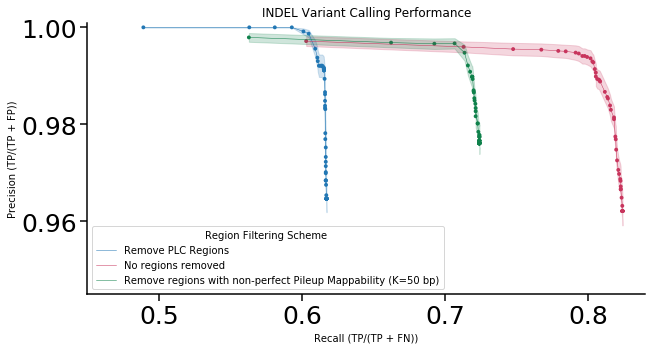

In [119]:
f, axes = plt.subplots(1, 1, figsize=(10,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.2, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)

axes.spines["left"].set_linewidth(1.5)
axes.spines["bottom"].set_linewidth(1.5)

sns.despine(ax=axes)

axes.tick_params(width=1.5, length=7)

#axes.xaxis.set_tick_params(width=1.5)
    
    
    
plt.title('INDEL Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")

axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.945, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=300)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


## Output Figure 5-B: INDEL VC Performance across different masking schemes

- No Legend
- Despine plot (w/ sns function)
- Change tick aspects

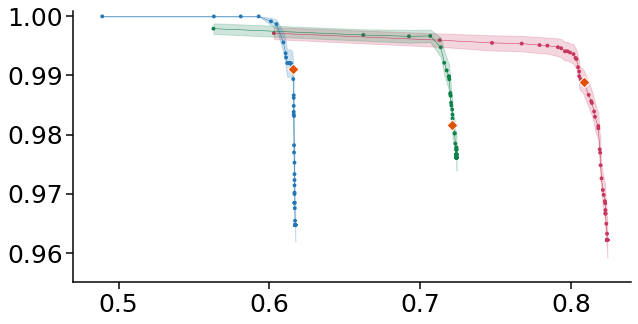

In [120]:
f, axes = plt.subplots(1, 1, figsize=(10,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.2, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "#E05307", #style = "variantType", # "#F08043"
                data = input_DF[ (input_DF["QQ"] == 40 )], ax=axes, marker="D", legend=False, s=60, linewidth=1, zorder=100)

axes.spines["left"].set_linewidth(1.5)
axes.spines["bottom"].set_linewidth(1.5)

sns.despine(ax=axes)

axes.tick_params(width=1.5, length=7)

#axes.xaxis.set_tick_params(width=1.5)
    
    
    
#plt.title('SNS Variant Calling Performance')
    
axes.set_xlabel("")
axes.set_ylabel("")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.47, 0.84)

axes.tick_params(labelsize= 25)

#plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/Fig5B_VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40BlackX.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/Fig5B_VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40BlackX.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=300)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


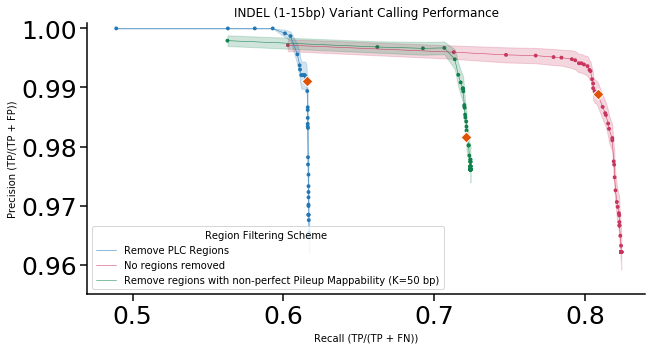

In [121]:
f, axes = plt.subplots(1, 1, figsize=(10,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False, palette=dictOf_FilterSchemeToColor, linewidth = 0.5)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=15, linewidth=0, palette=dictOf_FilterSchemeToColor)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.2, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "#E05307", #style = "variantType", # "#F08043"
                data = input_DF[ (input_DF["QQ"] == 40 )], ax=axes, marker="D", legend=False, s=60, linewidth=1, zorder=100)

axes.spines["left"].set_linewidth(1.5)
axes.spines["bottom"].set_linewidth(1.5)

sns.despine(ax=axes)

axes.tick_params(width=1.5, length=7)

#axes.xaxis.set_tick_params(width=1.5)
    
    
    
plt.title('INDEL (1-15bp) Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.47, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()


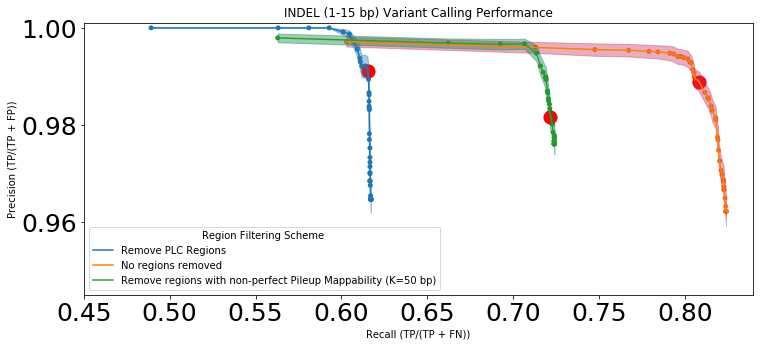

In [122]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)



sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 40 )], ax=axes, marker="o", legend=False, s=200, linewidth=0)


#sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
#                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )], ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


plt.title('INDEL (1-15 bp) Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.945, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40RedDot.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40RedDot.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


In [123]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 40)] 

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
240  40      MM2vsPilon_CoscollaRegionsRemoved      INDELs            0.615410               0.991133             0.001765              0.757668      84.833333      51.250000      84.805556       0.555556        0.194444           0.010430              0.002266            0.000609             0.008339      5.727475      2.887954      5.722806      0.128757       0.066898
242  40                 MM2vsPilon_NoneRemoved      INDELs            0.808410               0.988836             0.004237              0.888085     110.305556      25.777778     112.250000       1.250000        0.500000           0.011265              0.002065            0.001152             0.007363      7.004173      2.111612      6.982560      0.240288       0.140859
244  40  MM2vsPilon_Pmap_K50E4_Below_1_Removed      INDELs            0.721404               0.981680             0.004527              0.830228      99.027778      37.055556      99.055556       1.888889        0.472222           0.010465              0.002311            0.001290             0.007373      6.479698      2.372442      6.466881      0.263607       0.140781

Mask PLC regions.        F1 score = 0.75. Precison = 99.1%.   Recall = 61.6%

Mask non-unique regions. F1 score = 0.83. Precision = 98.2%   Recall = 72.1%

No masking of regions    F1 score = 0.88  Precision = 98.8%   Recall = 80.9%


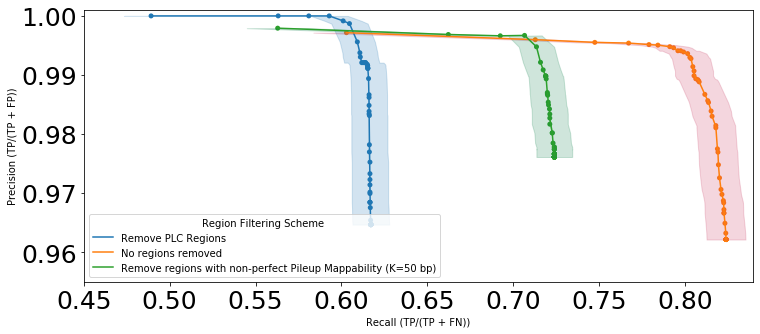

In [124]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, 
    #                 y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
    #                 y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


plt.show()


mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


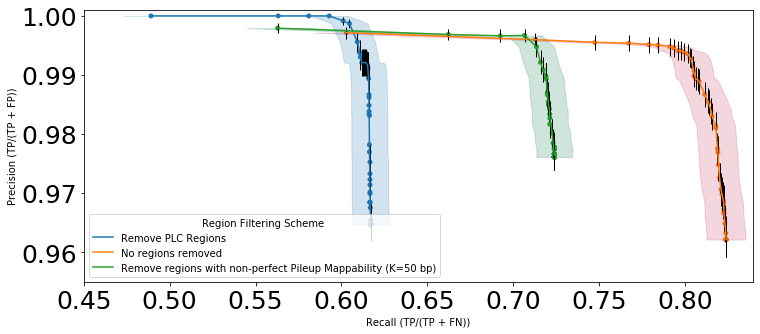

In [125]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, 
    #                 y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
    #                 y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded_Precision_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded_Precision_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


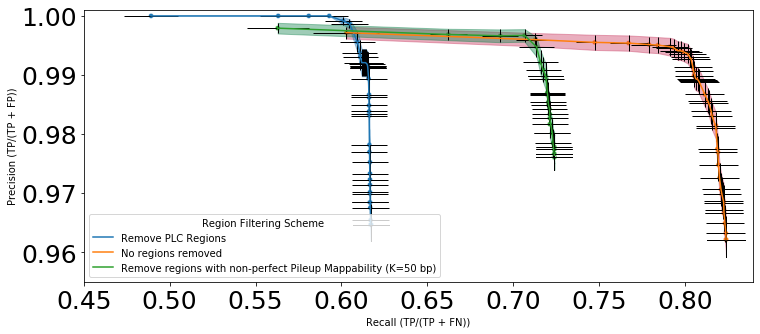

In [126]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs

### Precision Recall


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)


for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

In [127]:
HapPy_PR_DF_INDELs["RegionFilteringScheme"].value_counts()

MM2vsPilon_CoscollaRegionsRemoved        61
MM2vsPilon_Pmap_K50E4_Below_1_Removed    61
MM2vsPilon_NoneRemoved                   61
Name: RegionFilteringScheme, dtype: int64

In [128]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

QQ   RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
206  34  MM2vsPilon_NoneRemoved      INDELs            0.818106               0.981443             0.004378              0.890859     111.583333           24.5     113.527778       2.083333        0.527778           0.011281              0.002244            0.001133             0.007253      7.044797      2.081475      7.038498      0.253155       0.140781

# Let's look at SNV Precision-Recall of all 31 samples together (With Standard Masking Filter)

In [129]:
HapPy_PR_DF_Indiv_SNPs = HapPy_PR_DF_IndividualCurves[HapPy_PR_DF_IndividualCurves["variantType"] == "SNPs"]
HapPy_PR_DF_Indiv_SNPs_NoMasking = HapPy_PR_DF_Indiv_SNPs[HapPy_PR_DF_Indiv_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"] 

HapPy_PR_DF_Indiv_SNPs_NoMasking_QQ_0to60 = HapPy_PR_DF_Indiv_SNPs_NoMasking[ HapPy_PR_DF_Indiv_SNPs_NoMasking["QQ"].isin([1] + list(np.arange(5, 65, 5)) )]   



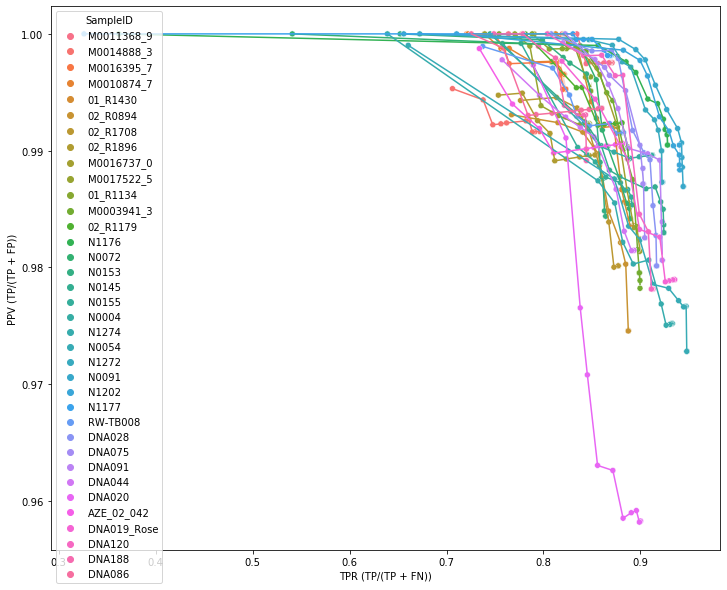

In [130]:
f, axes = plt.subplots(1, 1, figsize=(12,10))

### Precision Recall
sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "SampleID", 
             data = HapPy_PR_DF_Indiv_SNPs_NoMasking_QQ_0to60, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall", y="METRIC.Precision",  hue = "SampleID", 
                data = HapPy_PR_DF_Indiv_SNPs_NoMasking_QQ_0to60,
                ax=axes, )#s=100)

#axes.set_title("Precision-Recall Curve: Comparing different")
axes.set_xlabel("TPR (TP/(TP + FN))")
axes.set_ylabel("PPV (TP/(TP + FP))")
#axes.set_ylim(0.985, 1.001)
#axes.set_xlim(0.61, 0.9)

plt.show()

# Plot Precision-Recall for all samples (31 points) after using MQ >= 30 and Standard Masking Filter

In [131]:
HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30 = HapPy_PR_DF_Indiv_SNPs_NoMasking[ HapPy_PR_DF_Indiv_SNPs_NoMasking["QQ"] == 30]

In [132]:
HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30_Anno = pd.merge(HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30, PMP_36CI_AnalysisSet_AssemblySummary,  
                                               how='left', left_on=['SampleID', ], right_on = ['SampleID', ])         


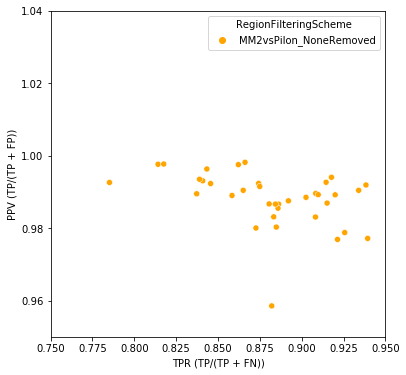

In [133]:
f, axes = plt.subplots(1, 1, figsize=(6,6))

### Precision Recall

sns.scatterplot(x="METRIC.Recall", y="METRIC.Precision",  hue = "RegionFilteringScheme", palette = ["orange"],
                data = HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30_Anno,
                ax=axes, )#s=100)

#axes.set_title("Precision-Recall Curve: Comparing different")
axes.set_xlabel("TPR (TP/(TP + FN))")
axes.set_ylabel("PPV (TP/(TP + FP))")
axes.set_ylim(0.95,1.04)
axes.set_xlim(0.75,0.95)

plt.show()


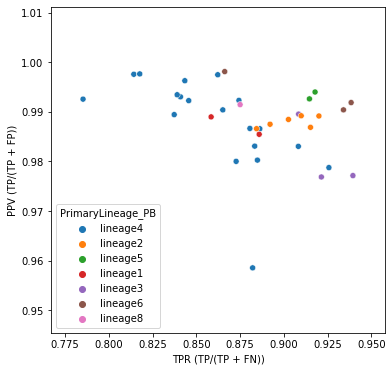

In [134]:
f, axes = plt.subplots(1, 1, figsize=(6,6))

### Precision Recall

sns.scatterplot(x="METRIC.Recall", y="METRIC.Precision",  hue = "PrimaryLineage_PB", 
                data = HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30_Anno,
                ax=axes, )#s=100)

#axes.set_title("Precision-Recall Curve: Comparing different")
axes.set_xlabel("TPR (TP/(TP + FN))")
axes.set_ylabel("PPV (TP/(TP + FP))")
#axes.set_ylim(0.95,1.04)
#axes.set_xlim(0.75,0.95)

plt.show()


## let's look into lineage specific P-R values

In [135]:
Pilon_Eval_DF_Indiv_SNPs_Anno = pd.merge(PMP_36CI_AnalysisSet_AssemblySummary, HapPy_PR_DF_Indiv_SNPs, 
                                               how='left', left_on=['SampleID', ], right_on = ['SampleID', ])

In [136]:
Pilon_Eval_DF_Indiv_SNPs_Anno.shape

(6588, 44)

In [137]:
Pilon_Eval_DF_Indiv_SNPs_Anno_NoMask = Pilon_Eval_DF_Indiv_SNPs_Anno[ (Pilon_Eval_DF_Indiv_SNPs_Anno["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved") ]        

In [138]:
Pilon_Eval_DF_Indiv_SNPs_Anno_NoMask.head(3)

SampleID  numContigs_Complete  circContig_Length  circContig_Cov  PacBio_Subread_Median_Length              LineageCall_Illumina                LineageCall_PacBio  F2_Illumina  F2_PacBio   ANI_I3  ANI_I3_PP  IlluminaWGSToH37rv_AvrgCov  PacBio_Subreads_H37Rv_AvrgCov  NumAnno_ORFs_PB_PilonPolished  NumAnno_ORFs_PB_DeNovo  GCcontent_PB_PP_GBK  NumChanges_PilonPolished  NumSNPs_PilonPolished  NumTotalInsertions_PilonPolished  Num1bpInsertion_PilonPolished  Num2bpInsertion_PilonPolished  NumTotalDeletions_PilonPolished  Num1bpDeletion_PilonPolished PrimaryLineage_PB PrimaryLineage_Ill       Dataset_Tag Type Subtype Subset Filter Genotype QQ.Field  QQ  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  TRUTH.TP  TRUTH.FN  QUERY.TP  QUERY.FP  QUERY.UNK   RegionFilteringScheme variantType
122  M0011368_9                    1            4397765             203                        3773.0  lineage4,lineage4.4,lineage4.4.1  lineage4,lineage4.4,lineage4.4.1     0.004937   0.305222  99.9368    99.9364                          40                            191                           4050                    4075            65.614721                        63                      0                                59                             58                              1                                4                             4          lineage4           lineage4  Farhat_Peru_2019  SNP       *      *   PASS        *  INFO.MQ   0       0.870726          0.997537         0.00123         0.929828     815.0     121.0     810.0       2.0        1.0  MM2vsPilon_NoneRemoved        SNPs
123  M0011368_9                    1            4397765             203                        3773.0  lineage4,lineage4.4,lineage4.4.1  lineage4,lineage4.4,lineage4.4.1     0.004937   0.305222  99.9368    99.9364                          40                            191                           4050                    4075            65.614721                        63                      0                                59                             58                              1                                4                             4          lineage4           lineage4  Farhat_Peru_2019  SNP       *      *   PASS        *  INFO.MQ   1       0.870726          0.997537         0.00123         0.929828     815.0     121.0     810.0       2.0        1.0  MM2vsPilon_NoneRemoved        SNPs
124  M0011368_9                    1            4397765             203                        3773.0  lineage4,lineage4.4,lineage4.4.1  lineage4,lineage4.4,lineage4.4.1     0.004937   0.305222  99.9368    99.9364                          40                            191                           4050                    4075            65.614721                        63                      0                                59                             58                              1                                4                             4          lineage4           lineage4  Farhat_Peru_2019  SNP       *      *   PASS        *  INFO.MQ   2       0.870726          0.997537         0.00123         0.929828     815.0     121.0     810.0       2.0        1.0  MM2vsPilon_NoneRemoved        SNPs

In [139]:
# https://stackoverflow.com/questions/19202093/how-to-select-columns-from-groupby-object-in-pandas
HapPy_Mean_ByLin_PR_DF = Pilon_Eval_DF_Indiv_SNPs_Anno_NoMask.groupby(["QQ", "RegionFilteringScheme", "variantType", "PrimaryLineage_PB"]).mean().reset_index()


In [140]:
HapPy_Mean_ByLin_PR_DF.head(2)

QQ   RegionFilteringScheme variantType PrimaryLineage_PB  numContigs_Complete  circContig_Length  circContig_Cov  PacBio_Subread_Median_Length  F2_Illumina  F2_PacBio     ANI_I3  ANI_I3_PP  IlluminaWGSToH37rv_AvrgCov  PacBio_Subreads_H37Rv_AvrgCov  NumAnno_ORFs_PB_PilonPolished  NumAnno_ORFs_PB_DeNovo  GCcontent_PB_PP_GBK  NumChanges_PilonPolished  NumSNPs_PilonPolished  NumTotalInsertions_PilonPolished  Num1bpInsertion_PilonPolished  Num2bpInsertion_PilonPolished  NumTotalDeletions_PilonPolished  Num1bpDeletion_PilonPolished  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score     TRUTH.TP    TRUTH.FN     QUERY.TP   QUERY.FP  QUERY.UNK
0   0  MM2vsPilon_NoneRemoved        SNPs          lineage1                  1.0       4.405308e+06      365.000000                       2220.00     0.022730   0.268023  99.876800  99.877200                       105.0                          359.0                    4042.000000                  4047.0            65.611525                 32.000000                    9.5                          3.000000                            2.0                       1.000000                        19.500000                     19.500000       0.876909          0.984288        0.012520         0.927451  2103.500000  295.500000  2098.500000  33.500000  27.000000
1   0  MM2vsPilon_NoneRemoved        SNPs          lineage2                  1.0       4.415333e+06      480.333333                       4863.25     0.009582   0.273964  99.890583  99.894033                        98.5                          462.0                    4072.666667                  4113.0            65.609448                110.166667                    3.5                         78.333333                           78.0                       0.333333                        28.333333                     28.333333       0.909859          0.981640        0.030943         0.944341  1456.333333  144.333333  1450.666667  27.166667  47.166667

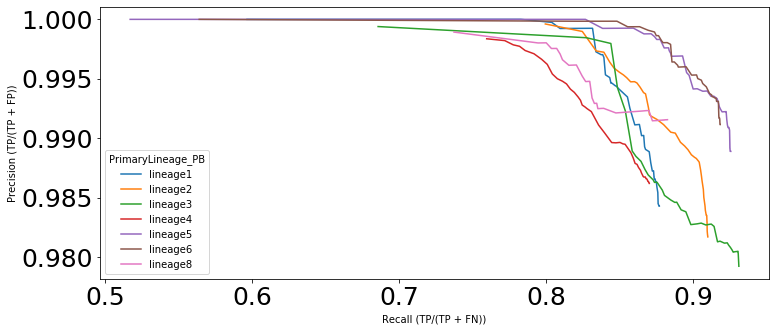

In [141]:
f, axes = plt.subplots(1, 1, figsize=(12,5))
input_DF = HapPy_Mean_ByLin_PR_DF  

### Precision Recall
sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "PrimaryLineage_PB", #style = "PrimaryLineage_PB",
             data = input_DF, ax=axes, legend="full")

axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
#axes.set_ylim(0.9,1.04)
#axes.set_xlim(0.72,1.04)

axes.tick_params(labelsize= 25)
plt.show()

In [142]:
HapPy_PR_DF_SNPs.head()

QQ                  RegionFilteringScheme variantType  METRIC.Recall_MEAN  METRIC.Precision_MEAN  METRIC.Frac_NA_MEAN  METRIC.F1_Score_MEAN  TRUTH.TP_MEAN  TRUTH.FN_MEAN  QUERY.TP_MEAN  QUERY.FP_MEAN  QUERY.UNK_MEAN  METRIC.Recall_SEM  METRIC.Precision_SEM  METRIC.Frac_NA_SEM  METRIC.F1_Score_SEM  TRUTH.TP_SEM  TRUTH.FN_SEM  QUERY.TP_SEM  QUERY.FP_SEM  QUERY.UNK_SEM
1   0      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
3   0                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056
5   0  MM2vsPilon_Pmap_K50E4_Below_1_Removed        SNPs            0.779845               0.997367             0.004658              0.874814    1175.305556     316.611111    1175.194444       3.055556        6.194444           0.006129              0.000463            0.000981             0.003871     80.429530     15.995102     80.424803      0.535923       1.321266
7   1      MM2vsPilon_CoscollaRegionsRemoved        SNPs            0.703950               0.992766             0.002119              0.823115    1067.611111     424.305556    1067.611111       7.055556        2.611111           0.006861              0.000878            0.000649             0.004729     76.325767     19.600973     76.325767      0.690002       0.774881
9   1                 MM2vsPilon_NoneRemoved        SNPs            0.889595               0.985446             0.009076              0.934579    1334.611111     157.305556    1329.694444      19.333333       13.916667           0.006137              0.001363            0.001794             0.003155     88.316713     10.774884     88.351201      1.873796       2.850056

### Let's look at a P-R Curve for each sample (28 isolates)

In [143]:
HapPy_PR_DF_Indiv_SNPs.head(3)

Type Subtype Subset Filter Genotype QQ.Field  QQ  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  TRUTH.TP  TRUTH.FN  QUERY.TP  QUERY.FP  QUERY.UNK    SampleID              RegionFilteringScheme variantType
0  SNP       *      *   PASS        *  INFO.MQ   0       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
1  SNP       *      *   PASS        *  INFO.MQ   1       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs
2  SNP       *      *   PASS        *  INFO.MQ   2       0.691239          0.998457             0.0         0.816919     647.0     289.0     647.0       1.0        0.0  M0011368_9  MM2vsPilon_CoscollaRegionsRemoved        SNPs

In [144]:
HapPy_PR_DF_Indiv_SNPs["Type"].value_counts()

SNP    6588
Name: Type, dtype: int64

In [145]:




SampleOfInterest = ["M0011368_9"] #, "M0015765_2", "M0003941_3", "DNA017", "DNA097", "02_R1675", "M0017522_5", "02_R1708",]

1 M0011368_9


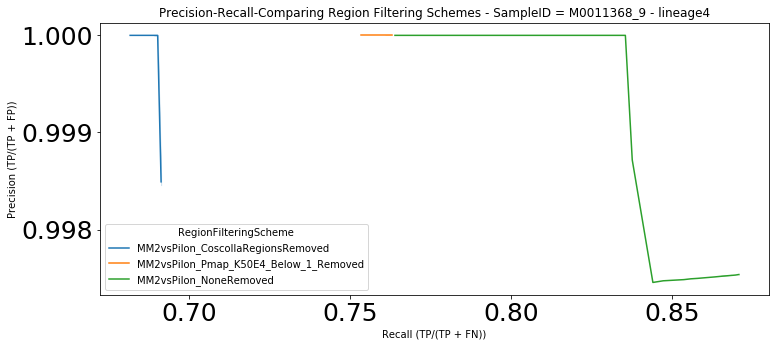

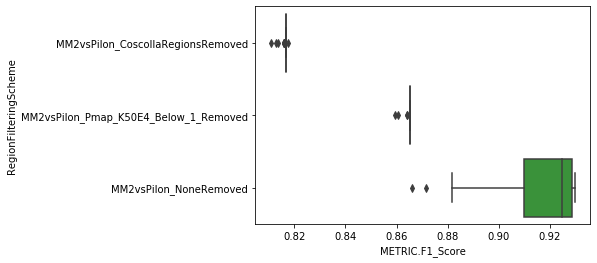

In [146]:
i = 1

for SampleID in (SampleOfInterest):
    
    print(i, SampleID)
    i += 1
    f, axes = plt.subplots(1, 1, figsize=(12,5))

    
    
    input_DF = HapPy_PR_DF_Indiv_SNPs[(HapPy_PR_DF_Indiv_SNPs["SampleID"] == SampleID)] #[HapPy_Mean_PR_DF_SNPs["QQ"] <= 255]  # HapPy_Mean_PR_DF_SNPs_QQ_0to55 #HapPy_Mean_PR_DF_mpileup

    sample_Lineage = ID_To_Lineage_Dict[SampleID]

    ### Precision Recall
    sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "RegionFilteringScheme", #style = "variantType",
                 data = input_DF, ax=axes, legend="full")
    
    axes.set_title(f"Precision-Recall-Comparing Region Filtering Schemes - SampleID = {SampleID} - {sample_Lineage}")
    axes.set_xlabel("Recall (TP/(TP + FN))")
    axes.set_ylabel("Precision (TP/(TP + FP))")
    #axes.set_ylim(0.72,1.04)
    #axes.set_xlim(0.72,1.04)
    axes.tick_params(labelsize= 25)

    plt.show()
    
    sns.boxplot(y="RegionFilteringScheme", x="METRIC.F1_Score", data=input_DF)
    plt.show()    
    

1 M0011368_9


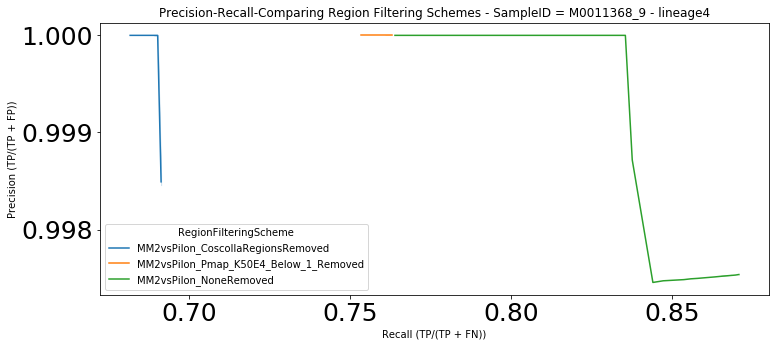

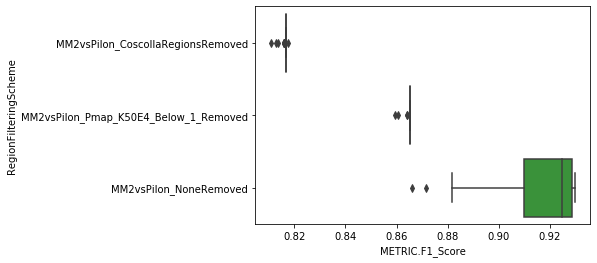

2 M0014888_3


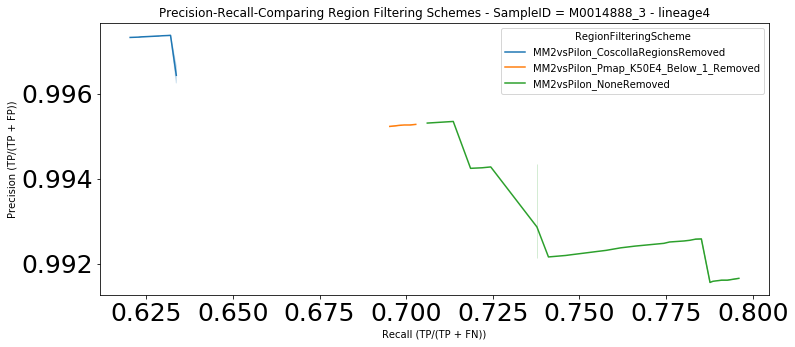

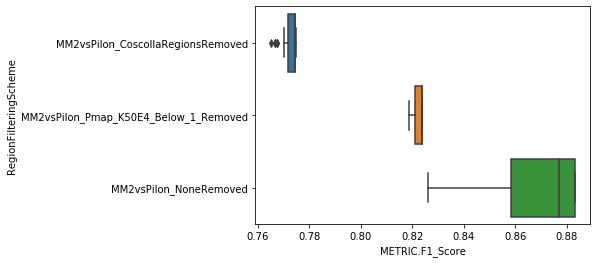

3 M0016395_7


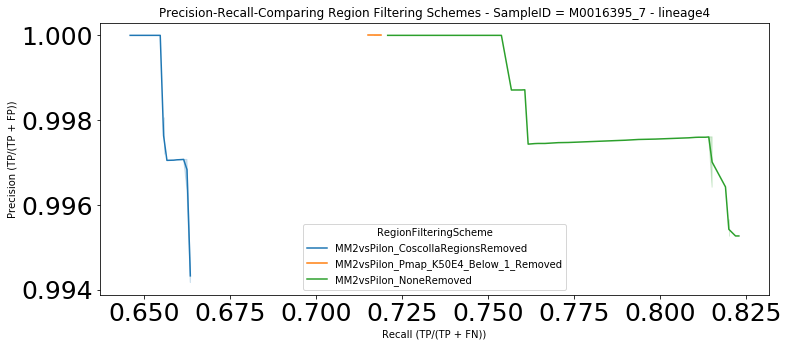

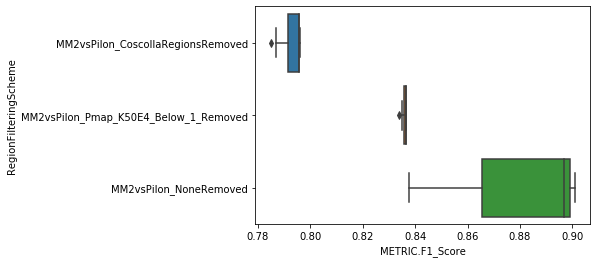

4 M0010874_7


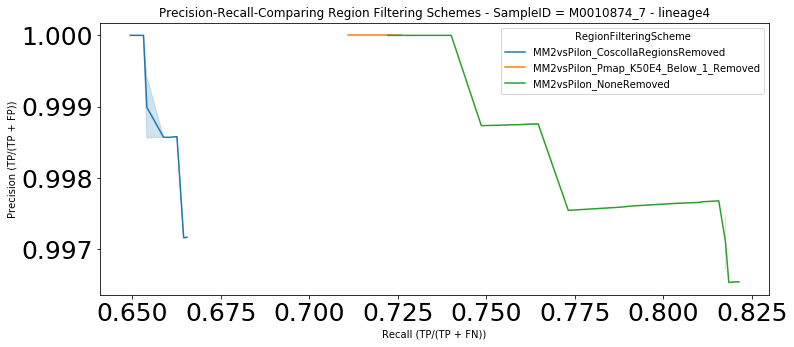

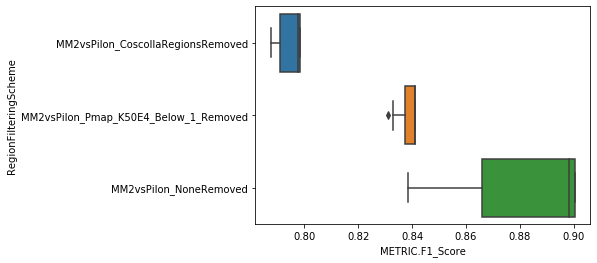

5 01_R1430


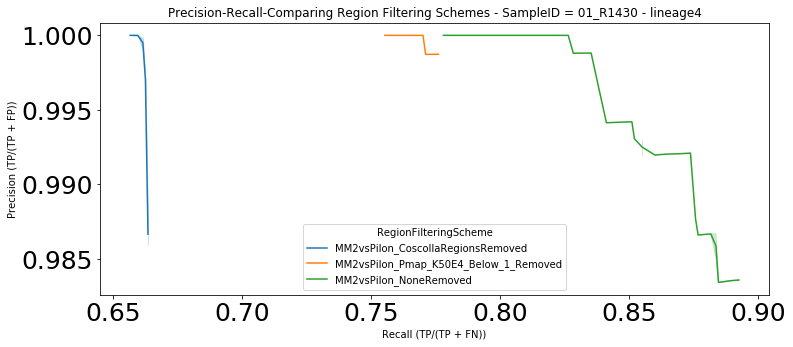

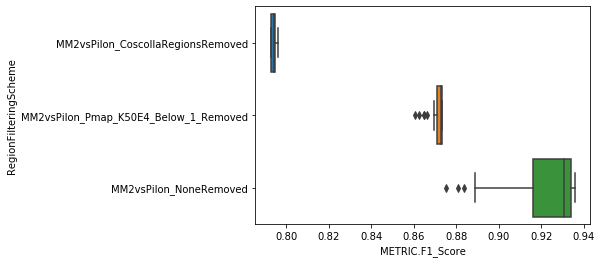

6 02_R0894


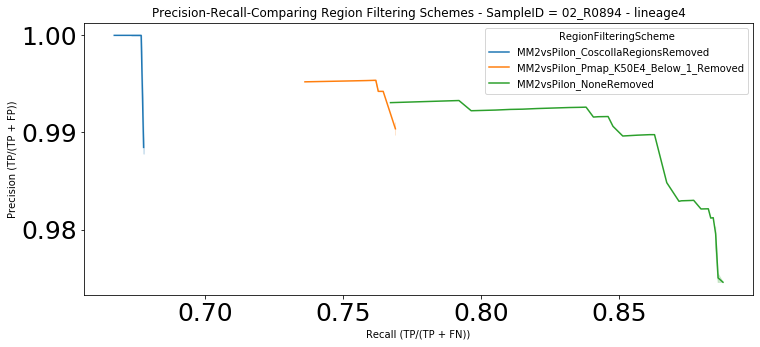

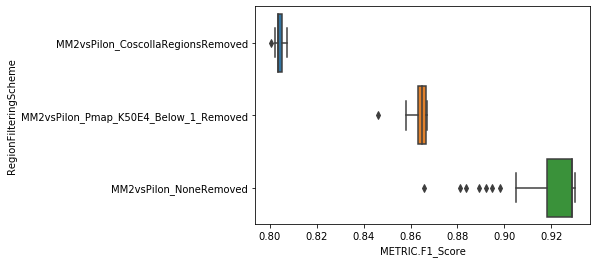

7 02_R1708


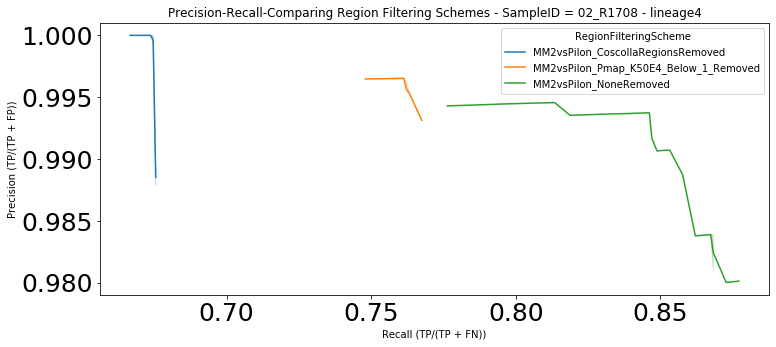

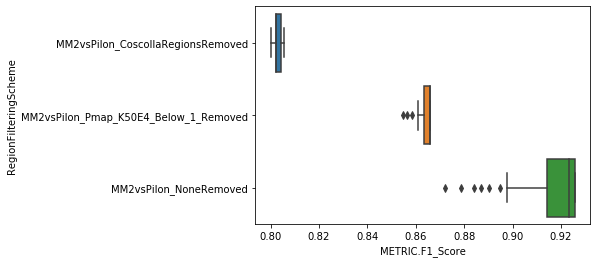

8 02_R1896


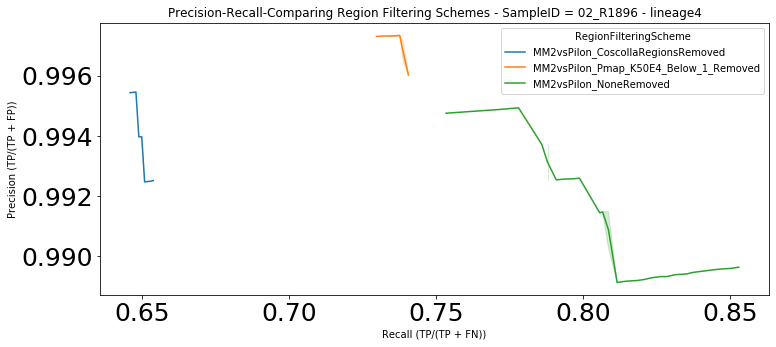

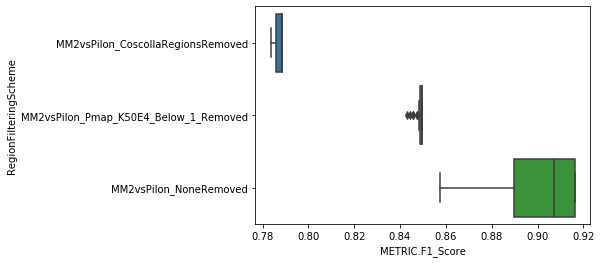

9 M0016737_0


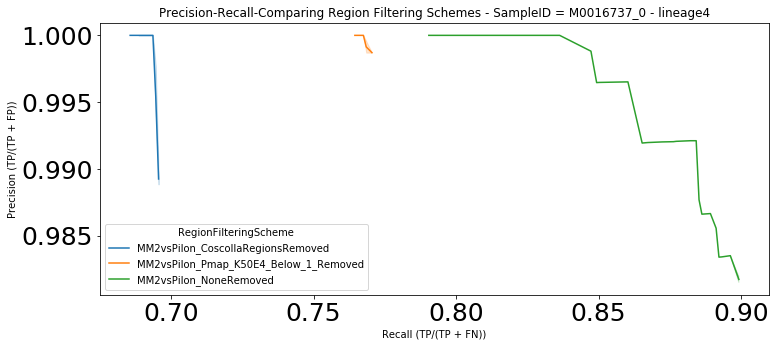

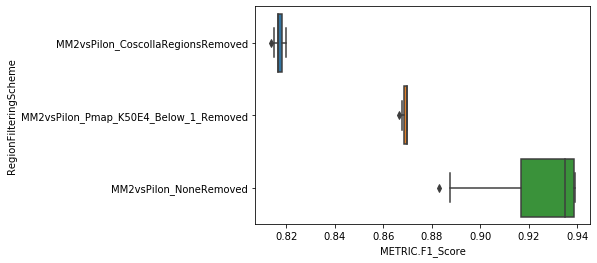

10 M0017522_5


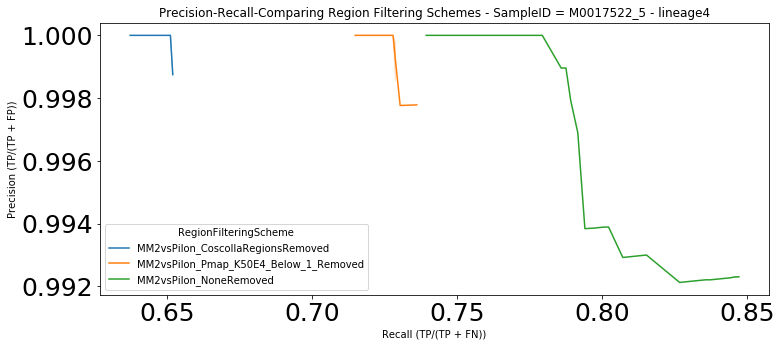

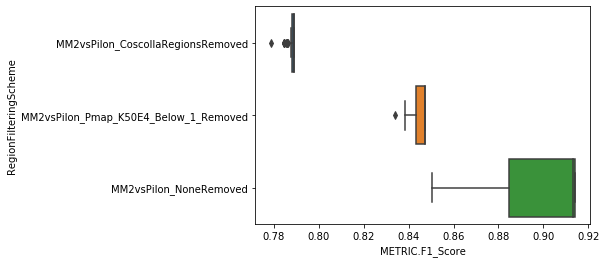

11 01_R1134


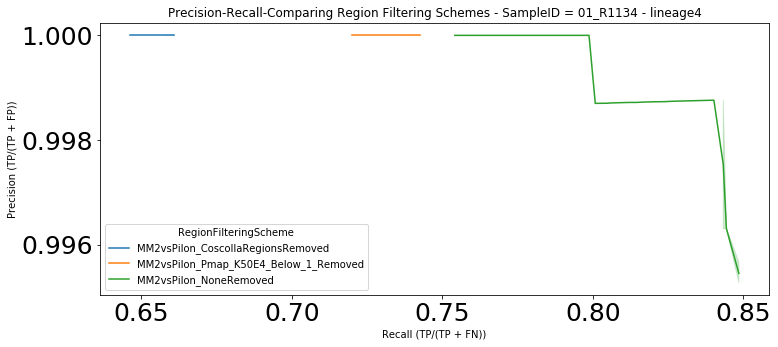

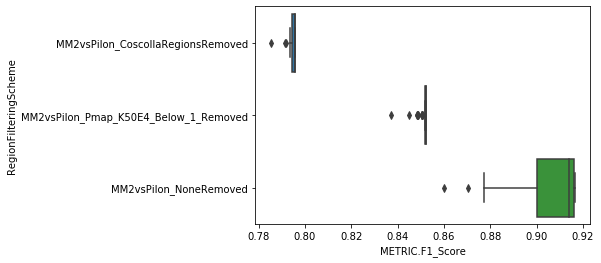

12 M0003941_3


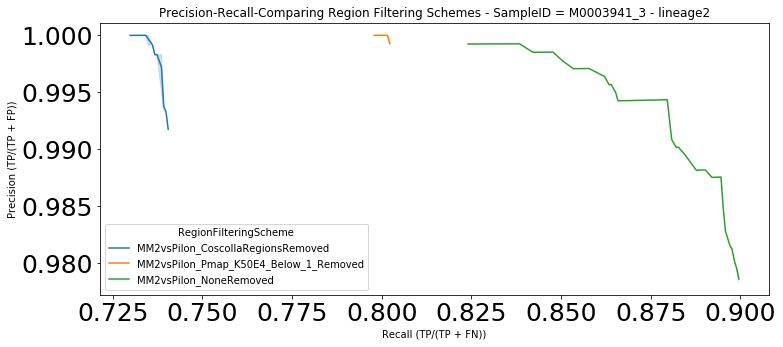

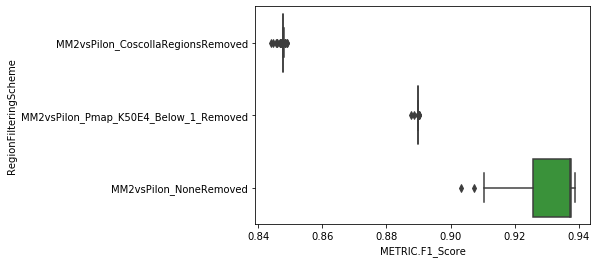

13 02_R1179


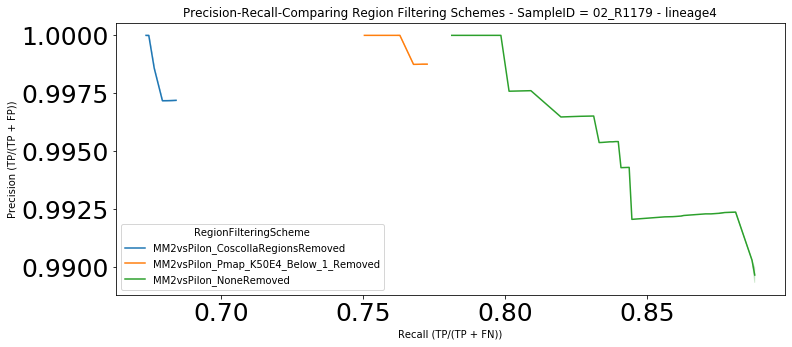

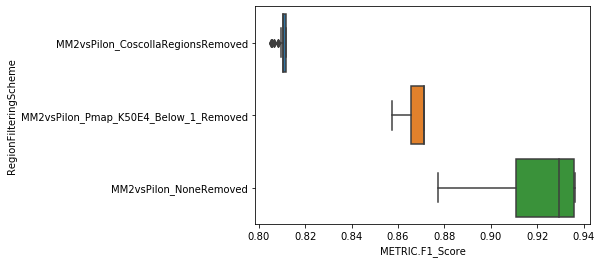

14 N1176


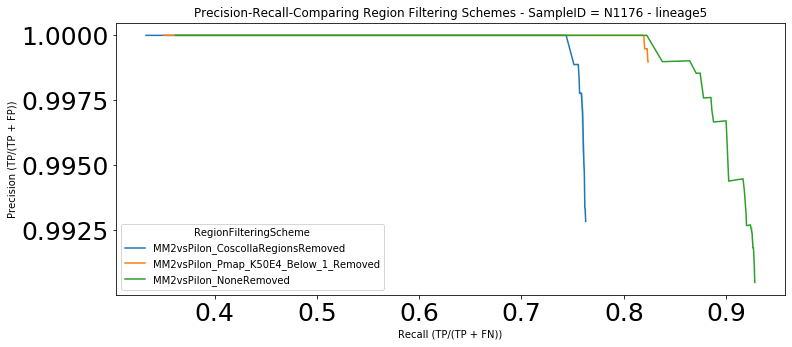

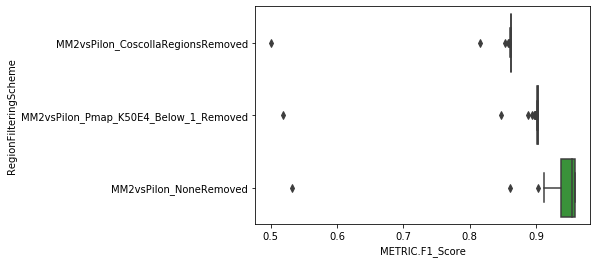

15 N0072


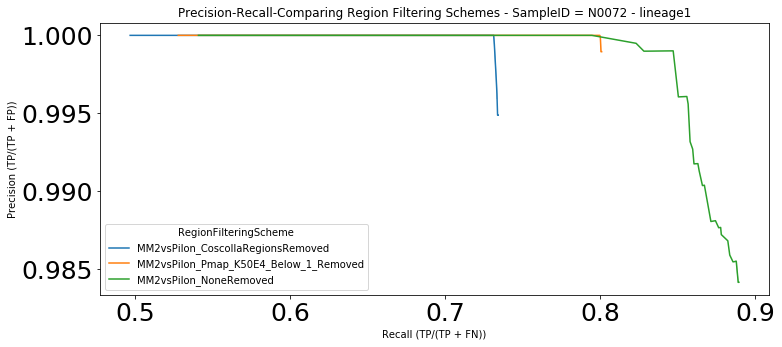

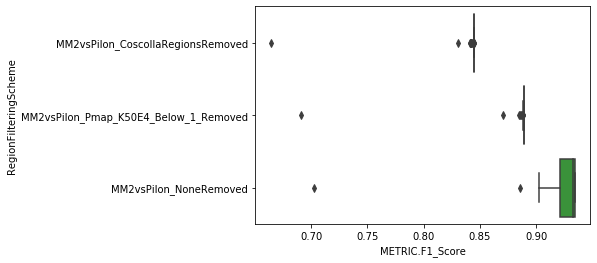

16 N0153


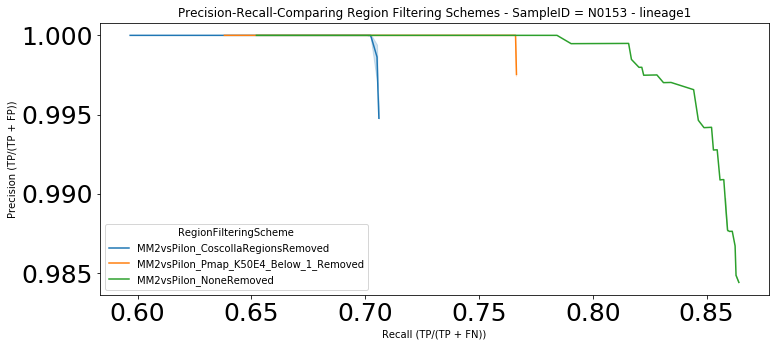

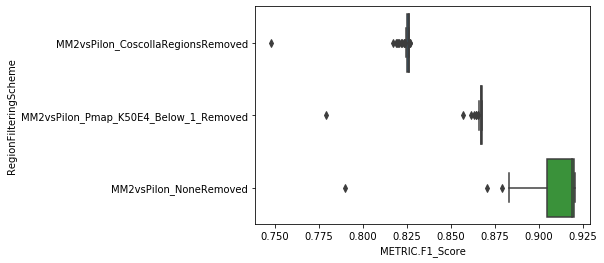

17 N0145


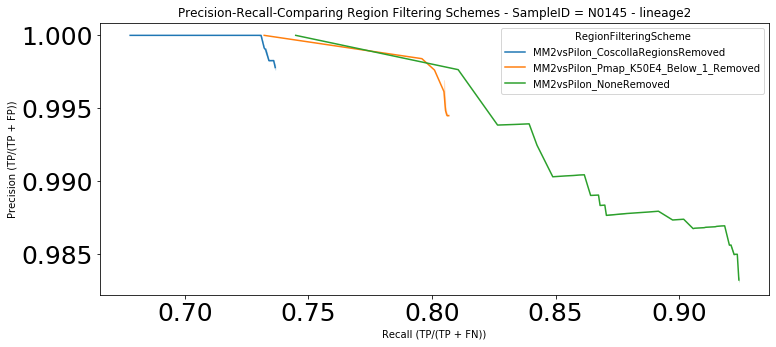

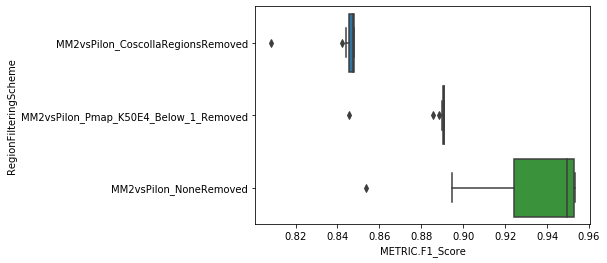

18 N0155


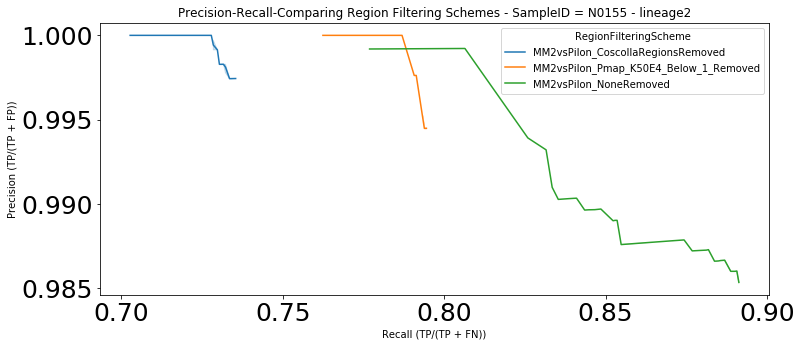

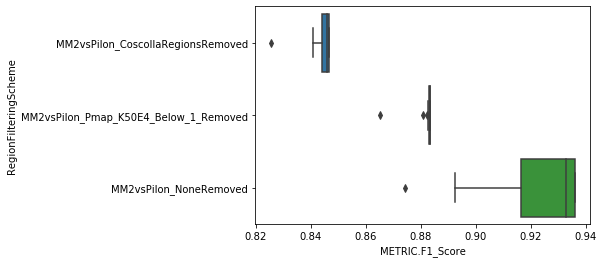

19 N0004


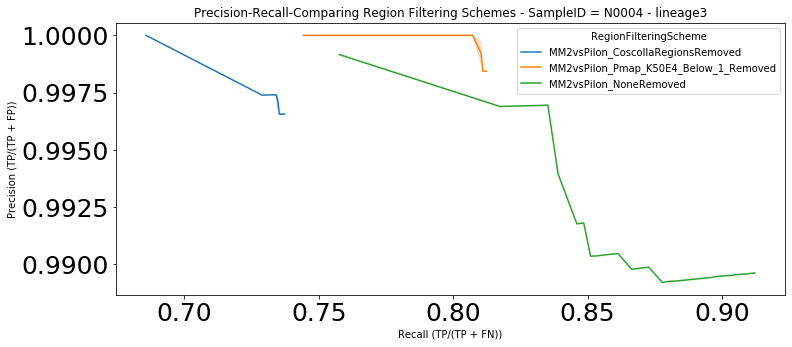

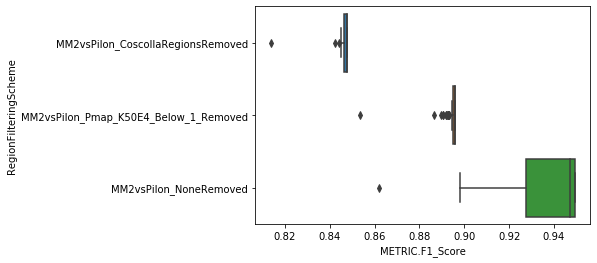

20 N1274


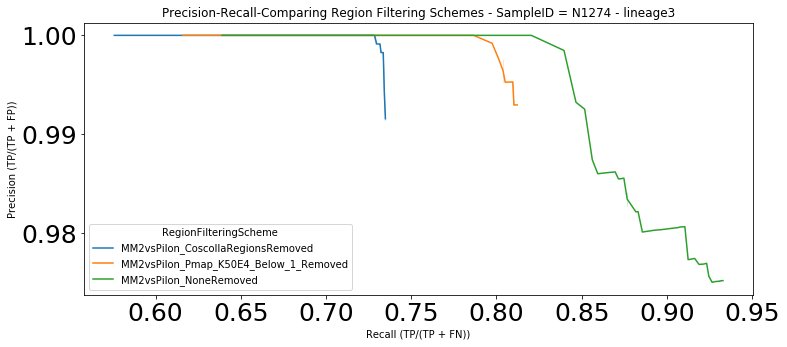

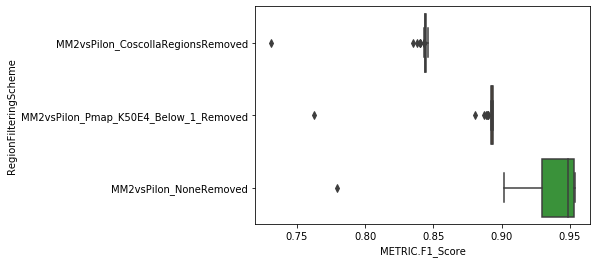

21 N0054


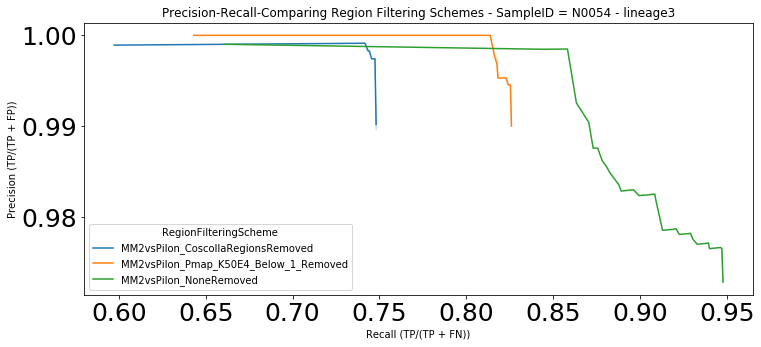

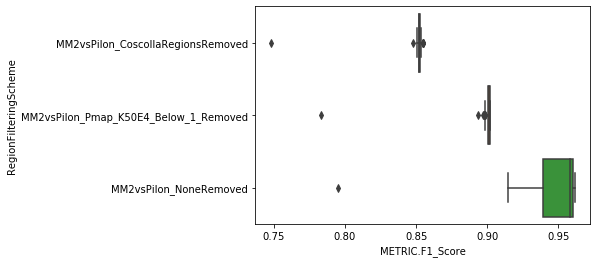

22 N1272


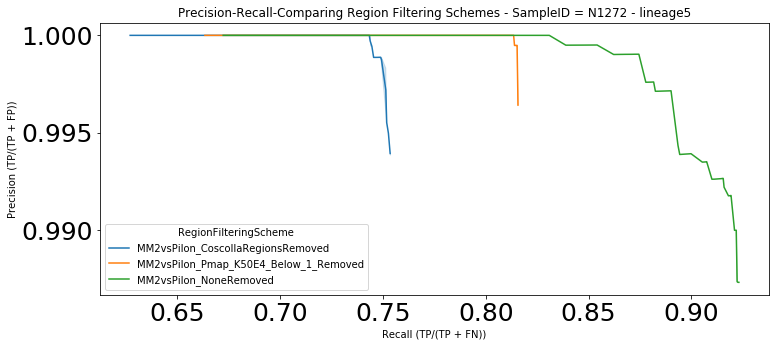

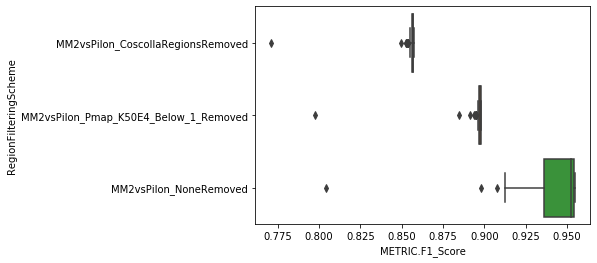

23 N0091


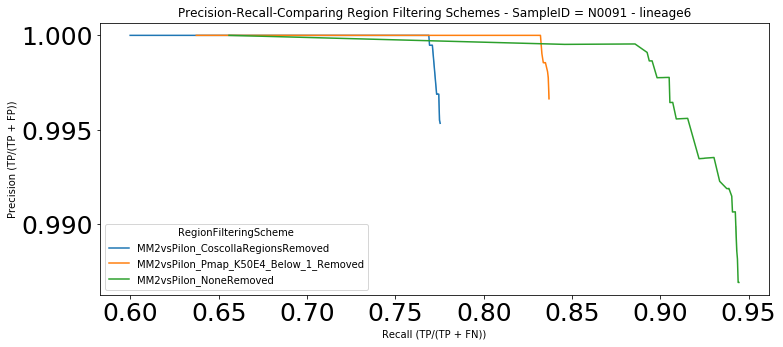

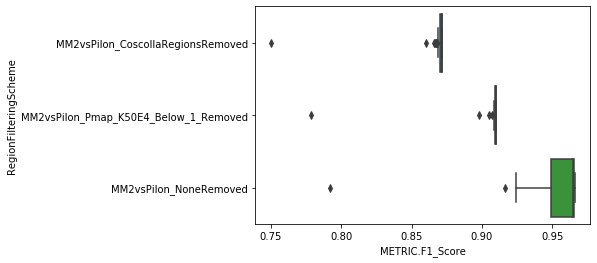

24 N1202


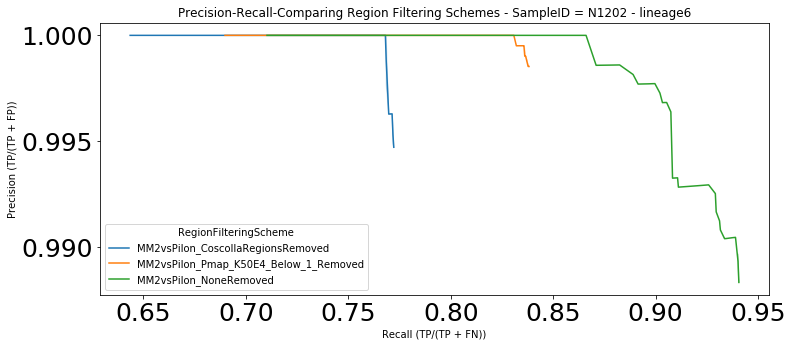

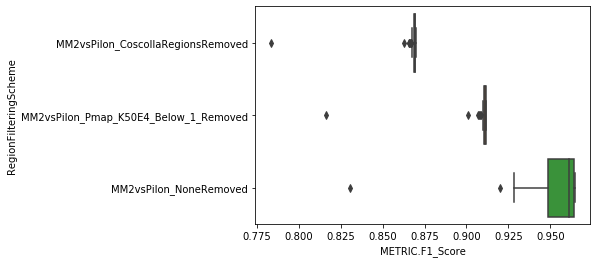

25 N1177


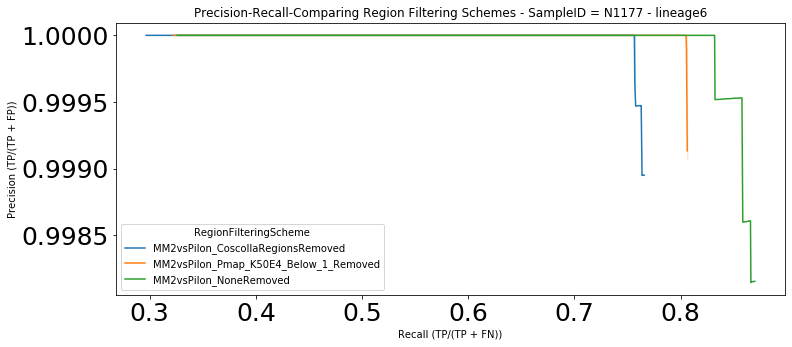

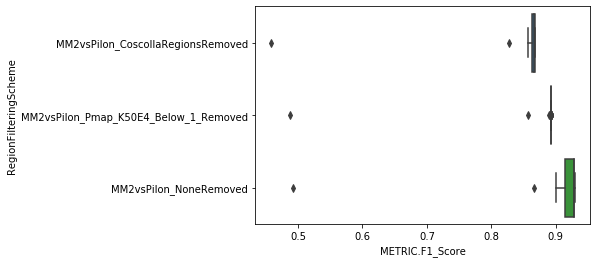

26 RW-TB008


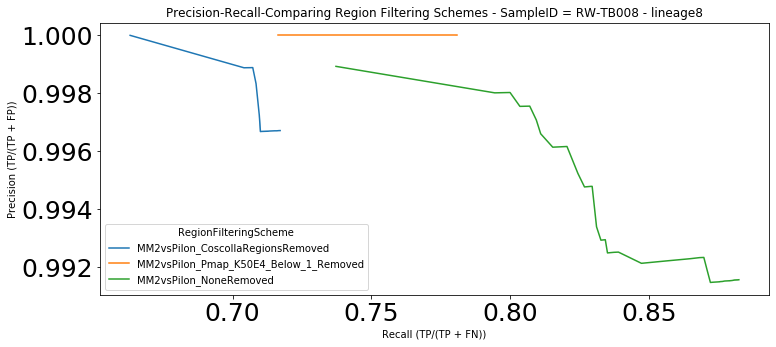

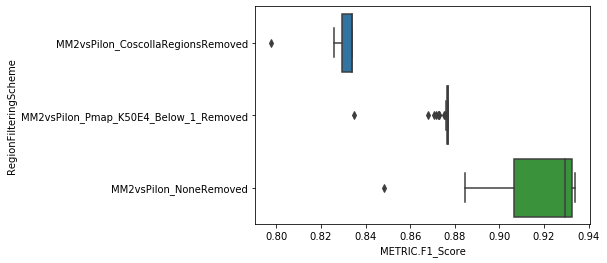

27 DNA028


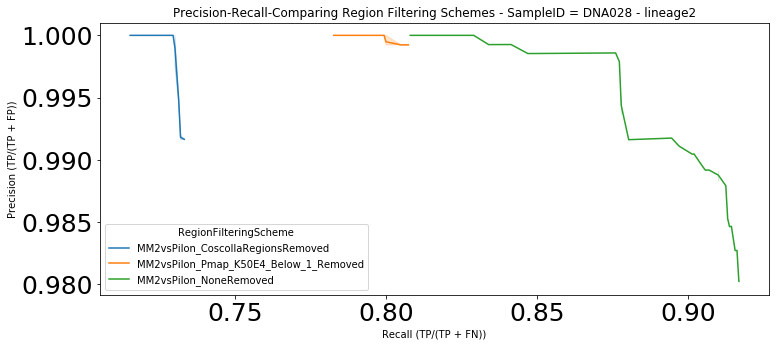

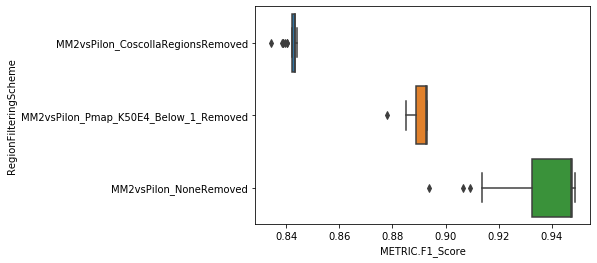

28 DNA075


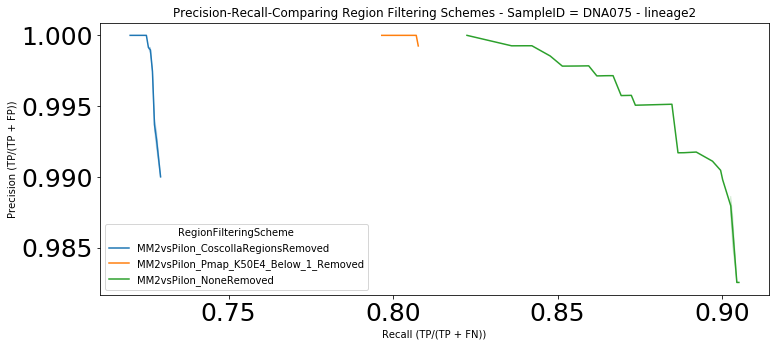

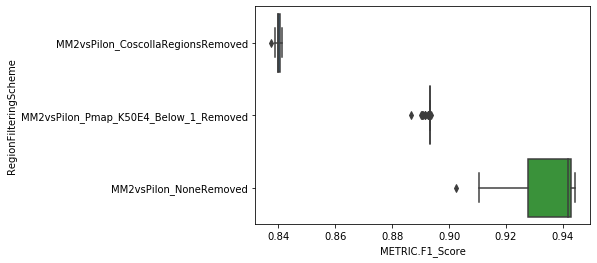

29 DNA091


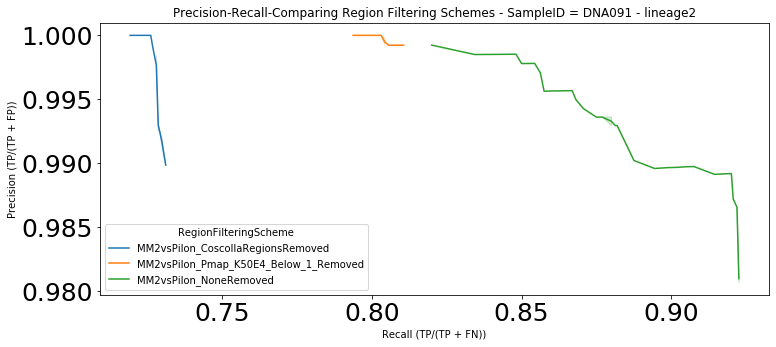

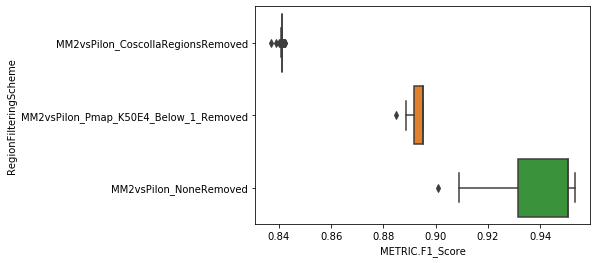

30 DNA044


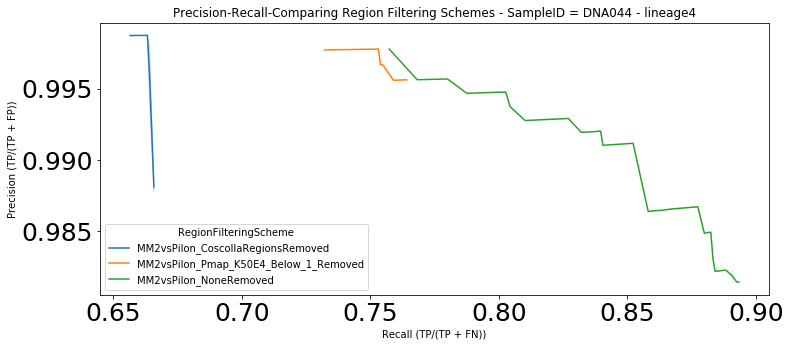

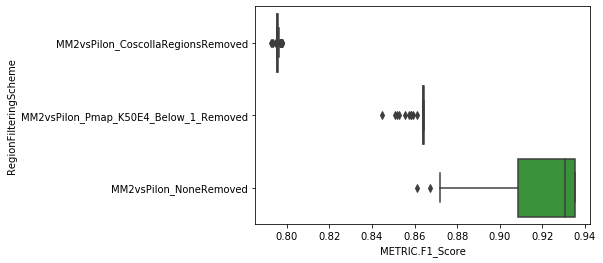

31 DNA020


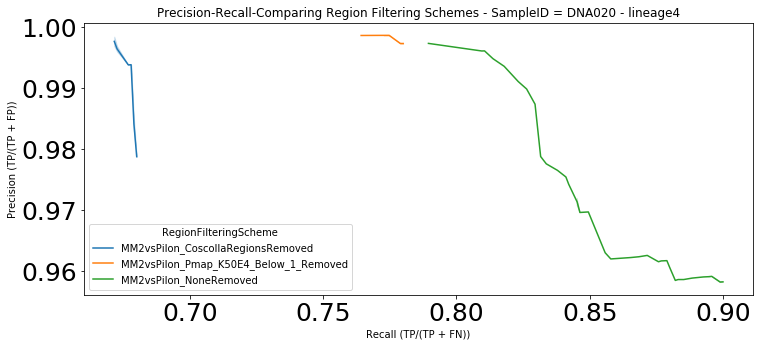

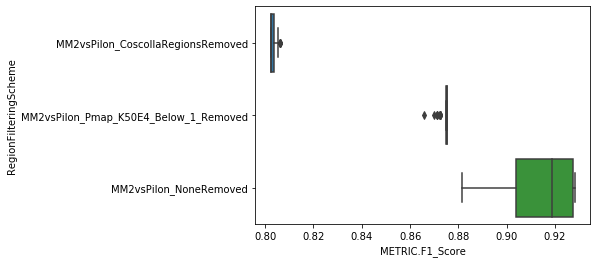

32 AZE_02_042


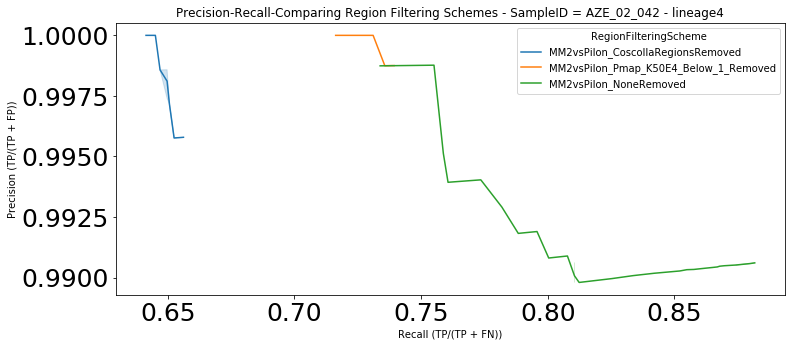

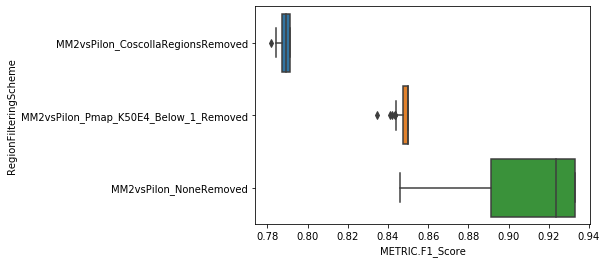

33 DNA019_Rose


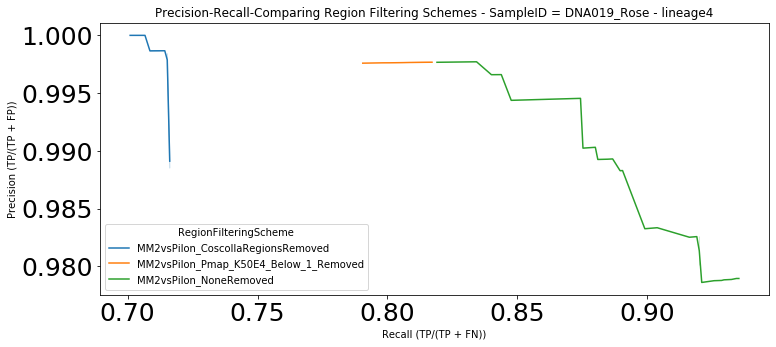

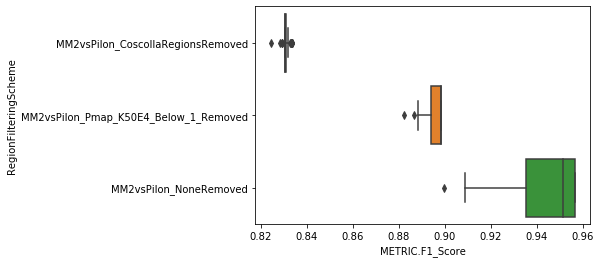

34 DNA120


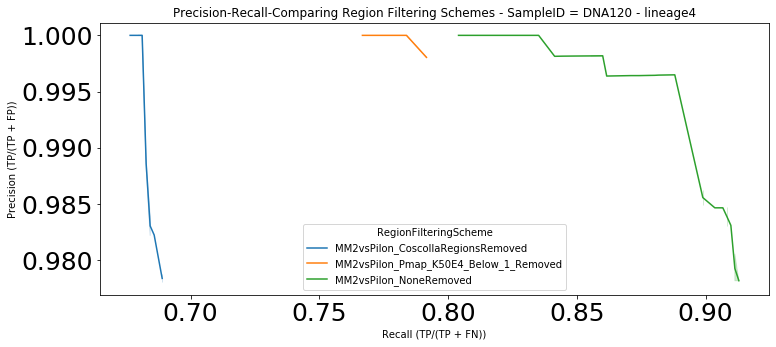

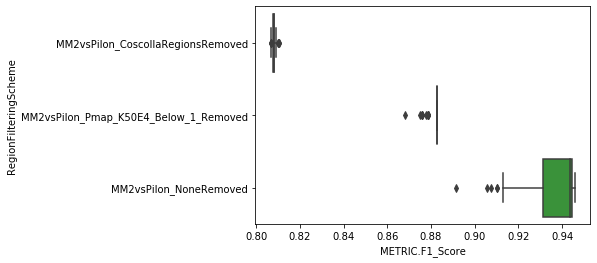

35 DNA188


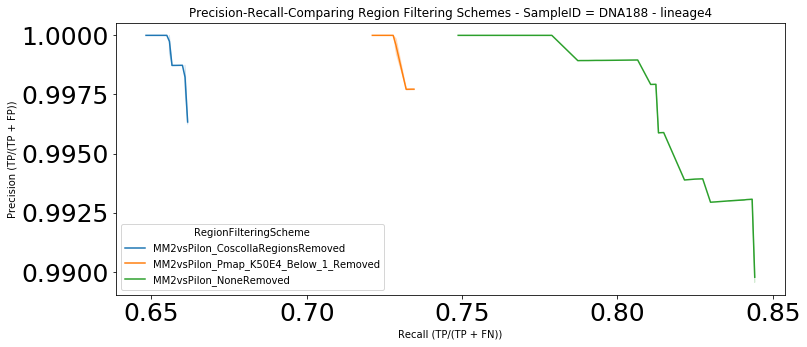

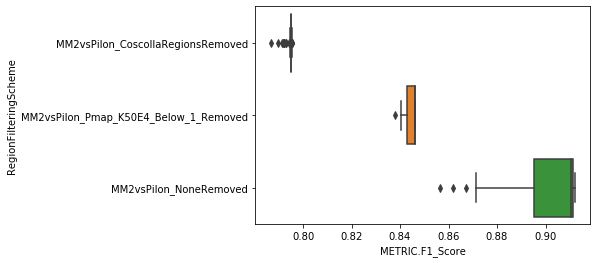

36 DNA086


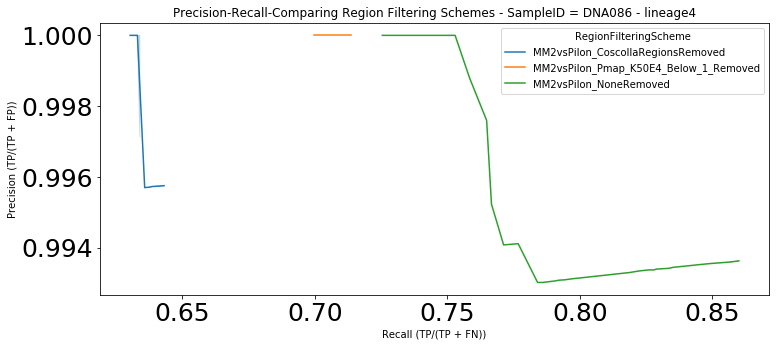

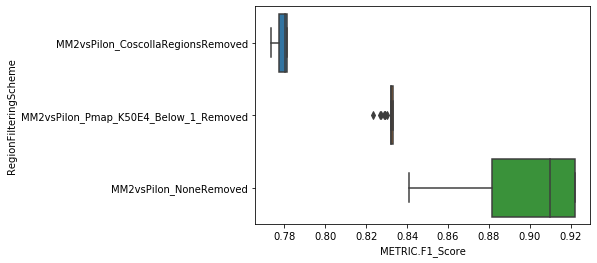

In [147]:
i = 1

for SampleID in (SampleIDs_36CI_SOI):
    
    print(i, SampleID)
    i += 1
    f, axes = plt.subplots(1, 1, figsize=(12,5))

    
    
    input_DF = HapPy_PR_DF_Indiv_SNPs[(HapPy_PR_DF_Indiv_SNPs["SampleID"] == SampleID)] #[HapPy_Mean_PR_DF_SNPs["QQ"] <= 255]  # HapPy_Mean_PR_DF_SNPs_QQ_0to55 #HapPy_Mean_PR_DF_mpileup

    sample_Lineage = ID_To_Lineage_Dict[SampleID]

    ### Precision Recall
    sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "RegionFilteringScheme", #style = "variantType",
                 data = input_DF, ax=axes, legend="full")
    
    axes.set_title(f"Precision-Recall-Comparing Region Filtering Schemes - SampleID = {SampleID} - {sample_Lineage}")
    axes.set_xlabel("Recall (TP/(TP + FN))")
    axes.set_ylabel("Precision (TP/(TP + FP))")
    #axes.set_ylim(0.72,1.04)
    #axes.set_xlim(0.72,1.04)
    axes.tick_params(labelsize= 25)

    plt.show()
    
    sns.boxplot(y="RegionFilteringScheme", x="METRIC.F1_Score", data=input_DF)
    plt.show()    
    